In [1]:
!pip install git+https://github.com/awslabs/fast-differential-privacy.git

  Cloning https://github.com/awslabs/fast-differential-privacy.git to /tmp/pip-req-build-8k8krvee
  Running command git clone --filter=blob:none --quiet https://github.com/awslabs/fast-differential-privacy.git /tmp/pip-req-build-8k8krvee
  Resolved https://github.com/awslabs/fast-differential-privacy.git to commit af783b348e82516f7565802cf1144a8be95c69a5
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Traceback (most recent call last):
  File "/home/ray/anaconda3/lib/python3.9/site-packages/packaging/requirements.py", line 35, in __init__
    parsed = _parse_requirement(requirement_string)
  File "/home/ray/anaconda3/lib/python3.9/site-packages/packaging/_parser.py", line 64, in parse_requirement
    return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
  File "/home/ray/anaconda3/lib/python3.9/site-packages/packaging/_parser.py", line 82, in _parse_requirement
    url, s

In [2]:
!pip install transformers torch


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Found credentials from IAM Role: cld_ktp4s9kggijipdihj3cy2lc46q-cluster-node-role


In [3]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Found credentials from IAM Role: cld_ktp4s9kggijipdihj3cy2lc46q-cluster-node-role


In [4]:
from fastDP import PrivacyEngine
import transformers, torch
import pandas as pd

In [6]:
path="/home/ray/default/synthetic_sentence_eps3_temp1_topk50.csv"
df = pd.read_csv(path)
print(df.shape)
df.head()

(2016, 11)


,medical_specialty,transcription,age_related_sentence,extracted_text,word_count,med_masked_transcriptions,pii_masked_transcriptions,synthetic_sentence_nodp_temp0.6_topk50,synthetic_sentence_eps16_temp1_topk50,synthetic_sentence_eps8_temp1_topk100,synthetic_sentence_eps3_temp1_topk100
0,Neurology,"CC:, Confusion and slurred speech.,HX , (prima...","HX , (primarily obtained from boyfriend): This...",(primarily obtained from boyfriend): This 31 y...,43,(primarily obtained from boyfriend): This[AGE]...,(primarily obtained from boyfriend): This[AGE]...,[BOS]Neurology[SEP]The patient is a 55-year-ol...,[BOS]Neurology[SEP]The patient is a 38-year-ol...,[BOS]Neurology[SEP]Shitetron[SEPSEP]The patien...,[BOS]Neurology[SEP]The patient is a 42-year-ol...
1,Cardiovascular/Pulmonary,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...","INDICATIONS FOR SURGERY,The patient is a 50-ye...",The patient is a 50-year-old white male with h...,72,The patient is a[AGE] white[SEX] with history ...,The patient is a[AGE] white[SEX] with history ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]This is a yo...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...
2,Urology,"PROCEDURE: , Elective male sterilization via b...","PROCEDURE: , Elective male sterilization via b...",Elective male sterilization via bilateral vase...,43,Elective male sterilization via bilateral vase...,Elective male sterilization via bilateral vase...,[BOS]Urology[SEP]The patient was brought to th...,[BOS]Urology[SEP]Cardiovascular/Pulmonary[SEP:...,[BOS]Urology[SEP]HISTORY OF DISHISTORY AND BEE...,[BOS]Urology[SEP]This is a 38-year-old with a ...
3,Urology,"DESCRIPTION:, The patient was placed in the s...","DESCRIPTION:, The patient was placed in the su...",The patient was placed in the supine position ...,44,The patient was placed in the supine position ...,The patient was placed in the supine position ...,[BOS]Urology[SEP]The patient is a 64-year-old ...,[BOS]Urology[SEP]The patient with a history of...,[BOS]Urology[SEP]Ophytology[SEPURE] The patien...,[BOS]Urology[SEP]The patient is referred to a ...
4,Urology,"PREOPERATIVE DIAGNOSIS: , Voluntary sterility....","INDICATIONS FOR PROCEDURE: ,A gentleman who i...",A gentleman who is here today requesting volun...,63,A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,"[BOS]Urology[SEP]HISTORY OF PRESENT ILLNESS:, ...","[BOS]Urology[SEP]HISTORY OF THE PROCEDURE:, Th...",[BOS]Urology[SEP]The patient is a 1-year-old f...,[BOS]Urology[SEP]Neurology[SEPUE]Neuroptic[SEP...


## Remove SEP

In [8]:
import re

def remove_before_sep(df, column_name):
    """
    Removes everything before '[SEP]' in the specified column of the DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: The name of the column to process.

    Returns:
    - df: DataFrame with the processed column.
    """
    # Define the regular expression pattern to match everything before '[SEP]'
    pattern = re.compile(r'.*?\[SEP\]')

    # Apply the regular expression to the specified column
    df[column_name] = df[column_name].apply(lambda x: re.sub(pattern, '', x))

    return df

In [9]:
# Remove everything before '[SEP]' in the 'synthetic_sentence2' column
df = remove_before_sep(df, 'synthetic_sentence_dp_eps16')
df = remove_before_sep(df, 'synthetic_sentence_dp_eps8_v2')
df = remove_before_sep(df, 'synthetic_sentence_dp_eps3')
df = remove_before_sep(df, 'synthetic_sentence_nodp_temp1')

## The AWS FastDP Privacy Engine Runs with ChatGPT 2 

* This gives a cuda out of memore error on the heavy GPUs 
* It runs succesfully on 32 vCPU, 128 GiB memory, takes around 5-10 min to run 


In [6]:
import torch
import torch.nn.functional as F
from torch.optim import SGD
from transformers import GPT2LMHeadModel
from fastDP import PrivacyEngine

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and move it to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)

# Define the optimizer
optimizer = SGD(model.parameters(), lr=0.05)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=32,  # Adjusted batch size for memory constraints
    sample_size=50000,
    epochs=3,
    target_epsilon=2,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Example training pipeline
# Assuming `batch` and `labels` are your input tensors and target labels respectively
# For this example, we'll create dummy data
batch = torch.randint(0, model.config.vocab_size, (32, 512), dtype=torch.long).to(device)  # Adjusted batch size
labels = torch.randint(0, model.config.vocab_size, (32, 512), dtype=torch.long).to(device)  # Adjusted batch size

# Standard training loop
outputs = model(batch)
loss = F.cross_entropy(outputs.logits.view(-1, model.config.vocab_size), labels.view(-1))
loss.backward()
optimizer.step()
optimizer.zero_grad()

print("Training step completed successfully.")


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Number of trainable components:  77 ; Number of trainable layers:  40
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']


/home/ray/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Training step completed successfully.


## Distilgpt 2 trained on medical dataset without FastDP Privacy Engine 

In [16]:
''''import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"Specialty: {self.labels[idx]} "
        text = specialty_label + self.texts[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training loop
for epoch in range(3):  # Increased epochs
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt="", max_length=50):
    model.eval()
    specialty_label = f"Specialty: {label} "
    input_ids = tokenizer.encode(specialty_label + prompt, return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95  # Top-p sampling (nucleus sampling)
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences
synthetic_sentences = []
for label in ["Orthopedic", "Urology", "Cardiovascular / Pulmonary", "Neurology", "Gastroenterology",
              "Obstetrics / Gynecology", "Hematology - Oncology", "ENT - Otolaryngology", "Radiology",
              "Pediatrics - Neonatal", "Ophthalmology"]:
    sentence = generate_synthetic_sentence(model, tokenizer, label, prompt="", max_length=50)
    synthetic_sentences.append((sentence, label))

print("Synthetic sentences generated:", synthetic_sentences)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [27]:
'''# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt="", max_length=50):
    model.eval()
    specialty_label = f"Specialty: {label} "
    input_ids = tokenizer.encode(specialty_label + prompt, return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_new_tokens=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95  # Top-p sampling (nucleus sampling)
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    extracted_text = row['extracted_text']
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt=extracted_text, max_length=50)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")

Synthetic sentences generated and saved to synthetic_data.csv


In [34]:
print(df.iloc[0]['extracted_text'])
print(df.iloc[0]['synthetic_sentence'])

The patient is a 73-year-old pleasant Caucasian male who is known to me from his previous hospitalization. He has also been seen by me in the clinic in the last few weeks.
Specialty: Cardiovascular / Pulmonary The patient is a 73-year-old pleasant Caucasian male who is known to me from his previous hospitalization. He has also been seen by me in the clinic in the last few weeks. The diagnosis for these symptoms is very complicated, and he was a very well-developedly, white male with a light complexion and a short weight. At the time of his appointment, he underwent an extensive evaluation for heart failure. This is the diagnosis


In [36]:
print(df.iloc[1]['extracted_text'])
print(df.iloc[1]['synthetic_sentence'])
print(df.iloc[1]['transcription'])

This is a 91-year-old male with a previous history of working in the coalmine and significant exposure to silica with resultant pneumoconiosis and fibrosis of the lung. The patient also has a positive history of smoking in the past.
Specialty: Cardiovascular / Pulmonary This is a 91-year-old male with a previous history of working in the coalmine and significant exposure to silica with resultant pneumoconiosis and fibrosis of the lung. The patient also has a positive history of smoking in the past. I have had a very small heart rate, pulmonary hypertension or pulmonary bronchoscopy. My chest is low at this time and a slight loss in volume of air mass and breath rate. When breathing is normal, my upper body is at the moment
history present illness 91yearold male previous history working coalmine significant exposure silica resultant pneumoconiosis fibrosis lung patient also positive history smoking past present time admitted continued management respiratory depression medical complicati

### Try from 18062024 

In [7]:
df.columns

Index(['medical_specialty', 'transcription', 'age_related_sentence',
       'extracted_text', 'word_count', 'med_masked_transcriptions',
       'pii_masked_transcriptions'],
      dtype='object')

In [8]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=3e-3)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.05)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Training loop
for epoch in range(5):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.6
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, max_length=125)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_nodp_temp0.6_topk50'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('2016_synthetic_sentence_nodp_temp0.6_topk50.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.


TypeError: generate_synthetic_sentence() missing 1 required positional argument: 'prompt'

In [10]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier_distilgpt2_nodp_2016"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to ./trained_model_with_classifier_distilgpt2_nodp_2016


In [11]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=0.6
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, max_length=125)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_nodp_temp0.6_topk50'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_bossep_2016.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep.csv")

Synthetic sentences generated and saved to synthetic_data_bossep.csv


In [13]:
df.to_csv('nodpcheck.csv', index=False)

## 18062024 16 Eps

In [14]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from fastDP import PrivacyEngine  # Ensure fastDP is installed

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=3e-3)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.05)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=64,
    sample_size=len(train_dataset),
    epochs=5,
    target_epsilon=16,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training loop
for epoch in range(5):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Detach and save the privacy engine state
privacy_engine.detach()

Number of trainable components:  77 ; Number of trainable layers:  40
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']


/home/ray/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.


In [15]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier_distilgpt2_dpeps16_2016"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to ./trained_model_with_classifier_distilgpt2_dpeps16_2016


In [16]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, max_length=80):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=1.0
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, max_length=80)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_eps16_temp1_topk50'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_sentence_eps16_temp1_topk50.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep.csv")

Synthetic sentences generated and saved to synthetic_data_bossep.csv


In [17]:
df

,medical_specialty,transcription,age_related_sentence,extracted_text,word_count,med_masked_transcriptions,pii_masked_transcriptions,synthetic_sentence_nodp_temp0.6_topk50,synthetic_sentence_eps16_temp1_topk50
0,Neurology,"CC:, Confusion and slurred speech.,HX , (prima...","HX , (primarily obtained from boyfriend): This...",(primarily obtained from boyfriend): This 31 y...,43,(primarily obtained from boyfriend): This[AGE]...,(primarily obtained from boyfriend): This[AGE]...,[BOS]Neurology[SEP]The patient is a 55-year-ol...,[BOS]Neurology[SEP]The patient is a 38-year-ol...
1,Cardiovascular/Pulmonary,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...","INDICATIONS FOR SURGERY,The patient is a 50-ye...",The patient is a 50-year-old white male with h...,72,The patient is a[AGE] white[SEX] with history ...,The patient is a[AGE] white[SEX] with history ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...
2,Urology,"PROCEDURE: , Elective male sterilization via b...","PROCEDURE: , Elective male sterilization via b...",Elective male sterilization via bilateral vase...,43,Elective male sterilization via bilateral vase...,Elective male sterilization via bilateral vase...,[BOS]Urology[SEP]The patient was brought to th...,[BOS]Urology[SEP]Cardiovascular/Pulmonary[SEP:...
3,Urology,"DESCRIPTION:, The patient was placed in the s...","DESCRIPTION:, The patient was placed in the su...",The patient was placed in the supine position ...,44,The patient was placed in the supine position ...,The patient was placed in the supine position ...,[BOS]Urology[SEP]The patient is a 64-year-old ...,[BOS]Urology[SEP]The patient with a history of...
4,Urology,"PREOPERATIVE DIAGNOSIS: , Voluntary sterility....","INDICATIONS FOR PROCEDURE: ,A gentleman who i...",A gentleman who is here today requesting volun...,63,A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,"[BOS]Urology[SEP]HISTORY OF PRESENT ILLNESS:, ...","[BOS]Urology[SEP]HISTORY OF THE PROCEDURE:, Th..."
...,...,...,...,...,...,...,...,...,...
2011,Cardiovascular/Pulmonary,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...","TYPE OF TEST: , Adenosine with nuclear scan as...",Adenosine with nuclear scan as the patient una...,41,Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...
2012,Cardiovascular/Pulmonary,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...","HISTORY OF PRESENT ILLNESS:, The patient is a...",The patient is a 40-year-old white male who pr...,46,The patient is a[AGE] white[SEX] who presents ...,The patient is a[AGE] white[SEX] who presents ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...
2013,Cardiovascular/Pulmonary,"HISTORY OF PRESENT ILLNESS: , The patient is a...","HISTORY OF PRESENT ILLNESS: , The patient is a...","HISTORY OF PRESENT ILLNESS: , The patient is a...",62,"HISTORY OF PRESENT ILLNESS: , The patient is a...","HISTORY OF PRESENT ILLNESS: , The patient is a...",[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]This is a 5-...
2014,Cardiovascular/Pulmonary,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",ABC is a 60-year-old gentleman who had a marke...,ABC is a 60-year-old gentleman who had a marke...,119,ABC is a[AGE][SEX] who had a[LAB_VALUE][LAB_VA...,ABC is a[AGE][SEX] who had a[LAB_VALUE][LAB_VA...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...


## 1806 Eps 8 including privacy accountant 

In [6]:
r"""
This file is adapted from the privacy accounting procedure in Opacus', which in turn is adapted from tf-privacy.
Below is the original documentation in Opacus.

*Based on Google's TF Privacy:* https://github.com/tensorflow/privacy/blob/master/tensorflow_privacy/privacy/analysis
/rdp_accountant.py.
*Here, we update this code to Python 3, and optimize dependencies.*

Functionality for computing Renyi Differential Privacy (RDP) of an additive
Sampled Gaussian Mechanism (SGM).

Example:
    Suppose that we have run an SGM applied to a function with L2-sensitivity of 1.

    Its parameters are given as a list of tuples
    ``[(q_1, sigma_1, steps_1), ..., (q_k, sigma_k, steps_k)],``
    and we wish to compute epsilon for a given target delta.

    The example code would be:

    >>> max_order = 32
    >>> orders = range(2, max_order + 1)
    >>> rdp = np.zeros_like(orders, dtype=float)
    >>> for q, sigma, steps in parameters:
    >>>     rdp += privacy_analysis.compute_rdp(q, sigma, steps, orders)
    >>> epsilon, opt_order = privacy_analysis.get_privacy_spent(orders, rdp, delta)
"""

import math
from typing import List, Sequence, Union

import numpy as np
from scipy import special


########################
# LOG-SPACE ARITHMETIC #
########################


def _log_add(logx: float, logy: float) -> float:
    r"""Adds two numbers in the log space.

    Args:
        logx: First term in log space.
        logy: Second term in log space.

    Returns:
        Sum of numbers in log space.
    """
    a, b = min(logx, logy), max(logx, logy)
    if a == -np.inf:  # adding 0
        return b
    # Use exp(a) + exp(b) = (exp(a - b) + 1) * exp(b)
    return math.log1p(math.exp(a - b)) + b  # log1p(x) = log(x + 1)


def _log_sub(logx: float, logy: float) -> float:
    r"""Subtracts two numbers in the log space.

    Args:
        logx: First term in log space. Expected to be greater than the second term.
        logy: First term in log space. Expected to be less than the first term.

    Returns:
        Difference of numbers in log space.

    Raises:
        ValueError
            If the result is negative.
    """
    if logx < logy:
        raise ValueError("The result of subtraction must be non-negative.")
    if logy == -np.inf:  # subtracting 0
        return logx
    if logx == logy:
        return -np.inf  # 0 is represented as -np.inf in the log space.

    try:
        # Use exp(x) - exp(y) = (exp(x - y) - 1) * exp(y).
        return math.log(math.expm1(logx - logy)) + logy  # expm1(x) = exp(x) - 1
    except OverflowError:
        return logx


def _compute_log_a_for_int_alpha(q: float, sigma: float, alpha: int) -> float:
    r"""Computes :math:`log(A_\alpha)` for integer ``alpha``.

    Notes:
        Note that
        :math:`A_\alpha` is real valued function of ``alpha`` and ``q``,
        and that 0 < ``q`` < 1.

        Refer to Section 3.3 of https://arxiv.org/pdf/1908.10530.pdf for details.

    Args:
        q: Sampling rate of SGM.
        sigma: The standard deviation of the additive Gaussian noise.
        alpha: The order at which RDP is computed.

    Returns:
        :math:`log(A_\alpha)` as defined in Section 3.3 of
        https://arxiv.org/pdf/1908.10530.pdf.
    """

    # Initialize with 0 in the log space.
    log_a = -np.inf

    for i in range(alpha + 1):
        log_coef_i = (
            math.log(special.binom(alpha, i))
            + i * math.log(q)
            + (alpha - i) * math.log(1 - q)
        )

        s = log_coef_i + (i * i - i) / (2 * (sigma ** 2))
        log_a = _log_add(log_a, s)

    return float(log_a)


def _compute_log_a_for_frac_alpha(q: float, sigma: float, alpha: float) -> float:
    r"""Computes :math:`log(A_\alpha)` for fractional ``alpha``.

    Notes:
        Note that
        :math:`A_\alpha` is real valued function of ``alpha`` and ``q``,
        and that 0 < ``q`` < 1.

        Refer to Section 3.3 of https://arxiv.org/pdf/1908.10530.pdf for details.

    Args:
        q: Sampling rate of SGM.
        sigma: The standard deviation of the additive Gaussian noise.
        alpha: The order at which RDP is computed.

    Returns:
        :math:`log(A_\alpha)` as defined in Section 3.3 of
        https://arxiv.org/pdf/1908.10530.pdf.
    """
    # The two parts of A_alpha, integrals over (-inf,z0] and [z0, +inf), are
    # initialized to 0 in the log space:
    log_a0, log_a1 = -np.inf, -np.inf
    i = 0

    z0 = sigma ** 2 * math.log(1 / q - 1) + 0.5

    while True:  # do ... until loop
        coef = special.binom(alpha, i)
        log_coef = math.log(abs(coef))
        j = alpha - i

        log_t0 = log_coef + i * math.log(q) + j * math.log(1 - q)
        log_t1 = log_coef + j * math.log(q) + i * math.log(1 - q)

        log_e0 = math.log(0.5) + _log_erfc((i - z0) / (math.sqrt(2) * sigma))
        log_e1 = math.log(0.5) + _log_erfc((z0 - j) / (math.sqrt(2) * sigma))

        log_s0 = log_t0 + (i * i - i) / (2 * (sigma ** 2)) + log_e0
        log_s1 = log_t1 + (j * j - j) / (2 * (sigma ** 2)) + log_e1

        if coef > 0:
            log_a0 = _log_add(log_a0, log_s0)
            log_a1 = _log_add(log_a1, log_s1)
        else:
            log_a0 = _log_sub(log_a0, log_s0)
            log_a1 = _log_sub(log_a1, log_s1)

        i += 1
        if max(log_s0, log_s1) < -30:
            break

    return _log_add(log_a0, log_a1)


def _compute_log_a(q: float, sigma: float, alpha: float) -> float:
    r"""Computes :math:`log(A_\alpha)` for any positive finite ``alpha``.

    Notes:
        Note that
        :math:`A_\alpha` is real valued function of ``alpha`` and ``q``,
        and that 0 < ``q`` < 1.

        Refer to Section 3.3 of https://arxiv.org/pdf/1908.10530.pdf
        for details.

    Args:
        q: Sampling rate of SGM.
        sigma: The standard deviation of the additive Gaussian noise.
        alpha: The order at which RDP is computed.

    Returns:
        :math:`log(A_\alpha)` as defined in the paper mentioned above.
    """
    if float(alpha).is_integer():
        return _compute_log_a_for_int_alpha(q, sigma, int(alpha))
    else:
        return _compute_log_a_for_frac_alpha(q, sigma, alpha)


def _log_erfc(x: float) -> float:
    r"""Computes :math:`log(erfc(x))` with high accuracy for large ``x``.

    Helper function used in computation of :math:`log(A_\alpha)`
    for a fractional alpha.

    Args:
        x: The input to the function

    Returns:
        :math=`log(erfc(x))`
    """
    return math.log(2) + special.log_ndtr(-x * 2 ** 0.5)


def _compute_rdp(q: float, sigma: float, alpha: float) -> float:
    r"""Computes RDP of the Sampled Gaussian Mechanism at order ``alpha``.

    Args:
        q: Sampling rate of SGM.
        sigma: The standard deviation of the additive Gaussian noise.
        alpha: The order at which RDP is computed.

    Returns:
        RDP at order ``alpha``; can be np.inf.
    """
    if q == 0:
        return 0

    # no privacy
    if sigma == 0:
        return np.inf

    if q == 1.0:
        return alpha / (2 * sigma ** 2)

    if np.isinf(alpha):
        return np.inf

    return _compute_log_a(q, sigma, alpha) / (alpha - 1)


def compute_rdp(
    q: float, noise_multiplier: float, steps: int, orders: Union[Sequence[float], float]
) -> Union[List[float], float]:
    r"""Computes Renyi Differential Privacy (RDP) guarantees of the
    Sampled Gaussian Mechanism (SGM) iterated ``steps`` times.

    Args:
        q: Sampling rate of SGM.
        noise_multiplier: The ratio of the standard deviation of the
            additive Gaussian noise to the L2-sensitivity of the function
            to which it is added. Note that this is same as the standard
            deviation of the additive Gaussian noise when the L2-sensitivity
            of the function is 1.
        steps: The number of iterations of the mechanism.
        orders: An array (or a scalar) of RDP orders.

    Returns:
        The RDP guarantees at all orders; can be ``np.inf``.
    """
    if isinstance(orders, float):
        rdp = _compute_rdp(q, noise_multiplier, orders)
    else:
        rdp = np.array([_compute_rdp(q, noise_multiplier, order) for order in orders])

    return rdp * steps


# Based on
#   https://github.com/tensorflow/privacy/blob/5f07198b66b3617b22609db983926e3ba97cd905/tensorflow_privacy/privacy/analysis/rdp_accountant.py#L237
def get_privacy_spent(orders, rdp, delta):
    """Compute epsilon given a list of RDP values and target delta.
    Args:
        orders: An array (or a scalar) of orders.
        rdp: A list (or a scalar) of RDP guarantees.
        delta: The target delta.
    Returns:
        Pair of (eps, optimal_order).
    Raises:
        ValueError: If input is malformed.
    """
    orders_vec = np.atleast_1d(orders)
    rdp_vec = np.atleast_1d(rdp)

    if delta <= 0:
        raise ValueError("Privacy failure probability bound delta must be >0.")
    if len(orders_vec) != len(rdp_vec):
        raise ValueError("Input lists must have the same length.")

    # Basic bound (see https://arxiv.org/abs/1702.07476 Proposition 3 in v3):
    #   eps = min( rdp_vec - math.log(delta) / (orders_vec - 1) )

    # Improved bound from https://arxiv.org/abs/2004.00010 Proposition 12 (in v4).
    # Also appears in https://arxiv.org/abs/2001.05990 Equation 20 (in v1).
    eps_vec = []
    for (a, r) in zip(orders_vec, rdp_vec):
        if a < 1:
            raise ValueError("Renyi divergence order must be >=1.")
        if r < 0:
            raise ValueError("Renyi divergence must be >=0.")

        if delta ** 2 + math.expm1(-r) >= 0:
            # In this case, we can simply bound via KL divergence:
            # delta <= sqrt(1-exp(-KL)).
            eps = 0  # No need to try further computation if we have eps = 0.
        elif a > 1.01:
            # This bound is not numerically stable as alpha->1.
            # Thus we have a min value of alpha.
            # The bound is also not useful for small alpha, so doesn't matter.
            eps = r + math.log1p(-1 / a) - math.log(delta * a) / (a - 1)
        else:
            # In this case we can't do anything. E.g., asking for delta = 0.
            eps = np.inf
        eps_vec.append(eps)

    idx_opt = np.argmin(eps_vec)
    return max(0, eps_vec[idx_opt]), orders_vec[idx_opt]

In [29]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from fastDP.privacy_engine import PrivacyEngine  # Ensure fastDP is installed

# Now you can use the compute_rdp and get_privacy_spent functions directly

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=3e-3)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.05)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=64,
    sample_size=len(train_dataset),
    epochs=5,
    target_epsilon=8,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
    accounting_mode='rdp'  # Specify the privacy accounting mode
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Define the orders for RDP accounting and delta
orders = range(2, 33)
delta = 1e-5

# Training loop
for epoch in range(5):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    # Calculate and print the privacy budget used so far
    rdp = compute_rdp(privacy_engine.sample_rate, privacy_engine.noise_multiplier, epoch + 1, orders)
    epsilon, best_alpha = get_privacy_spent(orders, rdp, delta)
    print(f"Epoch {epoch + 1} completed. Privacy budget: ε = {epsilon:.2f}, α = {best_alpha}")

# Detach and save the privacy engine state
privacy_engine.detach()

Number of trainable components:  77 ; Number of trainable layers:  40
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']
Epoch 1 completed. Privacy budget: ε = 3.77, α = 4
Epoch 2 completed. Privacy budget: ε = 4.44, α = 4
Epoch 3 completed. Privacy budget: ε = 4.98, α = 3
Epoch 4 completed. Privacy budget: ε = 5.03, α = 3
Epoch 5 completed. Privacy budget: ε = 5.09, α = 3


In [30]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier_distilgpt2_dpeps8_2016"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to ./trained_model_with_classifier_distilgpt2_dpeps8_2016


## 1906 Eps 3 including Privacy Accountant

In [7]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from fastDP.privacy_engine import PrivacyEngine  # Ensure fastDP is installed

# Now you can use the compute_rdp and get_privacy_spent functions directly

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=3e-3)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.05)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=64,
    sample_size=len(train_dataset),
    epochs=5,
    target_epsilon=3,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
    accounting_mode='rdp'  # Specify the privacy accounting mode
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Define the orders for RDP accounting and delta
orders = range(2, 33)
delta = 1e-5

# Training loop
for epoch in range(5):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    # Calculate and print the privacy budget used so far
    rdp = compute_rdp(privacy_engine.sample_rate, privacy_engine.noise_multiplier, epoch + 1, orders)
    epsilon, best_alpha = get_privacy_spent(orders, rdp, delta)
    print(f"Epoch {epoch + 1} completed. Privacy budget: ε = {epsilon:.2f}, α = {best_alpha}")

# Detach and save the privacy engine state
privacy_engine.detach()

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Number of trainable components:  77 ; Number of trainable layers:  40
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']


/home/ray/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Epoch 1 completed. Privacy budget: ε = 1.72, α = 7
Epoch 2 completed. Privacy budget: ε = 1.83, α = 6
Epoch 3 completed. Privacy budget: ε = 1.87, α = 6
Epoch 4 completed. Privacy budget: ε = 1.91, α = 6
Epoch 5 completed. Privacy budget: ε = 1.94, α = 6


In [8]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier_distilgpt2_dpeps3_2016"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to ./trained_model_with_classifier_distilgpt2_dpeps3_2016


## 1906 Model Classifier 

In [13]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Define the directory where the model and tokenizer are saved
save_directory = "/home/ray/default/trained_model_with_classifier_distilgpt2_dpeps16_2016"

# Load the model
model = GPT2LMHeadModel.from_pretrained(save_directory)

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained(save_directory)

# If necessary, move the model to the specified device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print("Model and tokenizer loaded from", save_directory)

Model and tokenizer loaded from /home/ray/default/trained_model_with_classifier_distilgpt2_dpeps16_2016


In [14]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, max_length=80):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=100,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=1.0
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, max_length=80)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_eps16_temp1_topk100'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_sentence_eps16_temp1_topk100.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep.csv")

Synthetic sentences generated and saved to synthetic_data_bossep.csv


In [12]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Define the directory where the model and tokenizer are saved
save_directory = "/home/ray/default/trained_model_with_classifier_distilgpt2_nodp_2016"

# Load the model
model = GPT2LMHeadModel.from_pretrained(save_directory)

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained(save_directory)

# If necessary, move the model to the specified device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print("Model and tokenizer loaded from", save_directory)

Model and tokenizer loaded from /home/ray/default/trained_model_with_classifier_distilgpt2_nodp_2016


In [8]:
df.columns

Index(['medical_specialty', 'transcription', 'age_related_sentence',
       'extracted_text', 'word_count', 'med_masked_transcriptions',
       'pii_masked_transcriptions', 'synthetic_sentence_nodp_temp0.6_topk50',
       'synthetic_sentence_eps16_temp1_topk50',
       'synthetic_sentence_eps8_temp1_topk100',
       'synthetic_sentence_eps3_temp1_topk100'],
      dtype='object')

In [9]:
!pip install codecarbon


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Found credentials from IAM Role: cld_ktp4s9kggijipdihj3cy2lc46q-cluster-node-role


In [10]:
df.columns

Index(['medical_specialty', 'transcription', 'age_related_sentence',
       'extracted_text', 'word_count', 'med_masked_transcriptions',
       'pii_masked_transcriptions', 'synthetic_sentence_nodp_temp0.6_topk50',
       'synthetic_sentence_eps16_temp1_topk50',
       'synthetic_sentence_eps8_temp1_topk100',
       'synthetic_sentence_eps3_temp1_topk100'],
      dtype='object')

In [11]:
'''import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
from codecarbon import track_emissions

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, max_length=80):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=0.8
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

@track_emissions(project_name="synthetic_sentence_generation")
def generate_and_save_synthetic_sentences(df, model, tokenizer, output_file='synthetic_sentence_nodp_temp0.8_topk50.csv'):
    # Generate synthetic sentences for each row in the dataframe
    synthetic_sentences = []
    for index, row in df.iterrows():
        specialty = row['medical_specialty']
        synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, max_length=80)
        synthetic_sentences.append(synthetic_sentence)

    # Append the synthetic sentences to the dataframe
    df['synthetic_sentence_nodp_temp0.8_topk50'] = synthetic_sentences

    # Save the dataframe with the synthetic sentences
    df.to_csv(output_file, index=False)
    print(f"Synthetic sentences generated and saved to {output_file}")

if __name__ == "__main__":
    generate_and_save_synthetic_sentences(df, model, tokenizer)

[codecarbon WARNING @ 11:33:29] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 11:33:29] [setup] RAM Tracking...
[codecarbon INFO @ 11:33:29] [setup] GPU Tracking...
[codecarbon INFO @ 11:33:29] No GPU found.
[codecarbon INFO @ 11:33:29] [setup] CPU Tracking...
[codecarbon WARNING @ 11:33:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 11:33:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) Platinum 8259CL CPU @ 2.50GHz
[codecarbon INFO @ 11:33:31] >>> Tracker's metadata:
[codecarbon INFO @ 11:33:31]   Platform system: Linux-6.5.0-1020-aws-x86_64-with-glibc2.31
[codecarbon INFO @ 11:33:31]   Python version: 3.9.19
[codecarbon INFO @ 11:33:31]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 11:33:31]   Available RAM : 124.434 GB
[codecarbon INFO @ 11:33:31]   CPU count: 32
[codecarbon INFO @ 11:33:31]   CPU model: Intel(R) Xeon(R) Platinum 8259CL CPU @ 2.50GHz
[codecarbon INFO @ 11:33:31]   GPU count: None


KeyboardInterrupt: 

In [26]:
df.columns

Index(['medical_specialty', 'transcription', 'age_related_sentence',
       'extracted_text', 'word_count', 'med_masked_transcriptions',
       'pii_masked_transcriptions', 'synthetic_sentence_nodp_temp0.6_topk50',
       'synthetic_sentence_eps16_temp1_topk50',
       'synthetic_sentence_eps8_temp1_topk100',
       'synthetic_sentence_eps3_temp1_topk100',
       'synthetic_sentence_eps16_temp1_topk100',
       'synthetic_sentence_nodp_temp0.8_topk50',
       'synthetic_sentence_nodp_temp1.0_topk50',
       'synthetic_sentence_nodp_temp1.2_topk50'],
      dtype='object')

In [25]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, max_length=80):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=100,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=0.6
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, max_length=80)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_nodp_temp0.6_topk100'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_sentence_nodp_temp0.6_topk100.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep.csv")

Synthetic sentences generated and saved to synthetic_data_bossep.csv


In [26]:
df.columns

Index(['medical_specialty', 'transcription', 'age_related_sentence',
       'extracted_text', 'word_count', 'med_masked_transcriptions',
       'pii_masked_transcriptions', 'synthetic_sentence_nodp_temp0.6_topk50',
       'synthetic_sentence_eps16_temp1_topk50',
       'synthetic_sentence_eps8_temp1_topk100',
       'synthetic_sentence_eps3_temp1_topk100',
       'synthetic_sentence_nodp_temp0.8_topk50',
       'synthetic_sentence_nodp_temp1.0_topk50',
       'synthetic_sentence_nodp_temp1.2_topk50',
       'synthetic_sentence_nodp_temp1.2_topk100',
       'synthetic_sentence_nodp_temp1.0_topk100',
       'synthetic_sentence_nodp_temp0.8_topk100',
       'synthetic_sentence_nodp_temp0.6_topk100'],
      dtype='object')

In [10]:
df

,medical_specialty,transcription,age_related_sentence,extracted_text,word_count,med_masked_transcriptions,pii_masked_transcriptions,synthetic_sentence_nodp_temp0.6_topk50,synthetic_sentence_eps16_temp1_topk50,synthetic_sentence_eps8_temp1_topk100
0,Neurology,"CC:, Confusion and slurred speech.,HX , (prima...","HX , (primarily obtained from boyfriend): This...",(primarily obtained from boyfriend): This 31 y...,43,(primarily obtained from boyfriend): This[AGE]...,(primarily obtained from boyfriend): This[AGE]...,[BOS]Neurology[SEP]The patient is a 55-year-ol...,[BOS]Neurology[SEP]The patient is a 38-year-ol...,[BOS]Neurology[SEP]Shitetron[SEPSEP]The patien...
1,Cardiovascular/Pulmonary,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...","INDICATIONS FOR SURGERY,The patient is a 50-ye...",The patient is a 50-year-old white male with h...,72,The patient is a[AGE] white[SEX] with history ...,The patient is a[AGE] white[SEX] with history ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]This is a yo...
2,Urology,"PROCEDURE: , Elective male sterilization via b...","PROCEDURE: , Elective male sterilization via b...",Elective male sterilization via bilateral vase...,43,Elective male sterilization via bilateral vase...,Elective male sterilization via bilateral vase...,[BOS]Urology[SEP]The patient was brought to th...,[BOS]Urology[SEP]Cardiovascular/Pulmonary[SEP:...,[BOS]Urology[SEP]HISTORY OF DISHISTORY AND BEE...
3,Urology,"DESCRIPTION:, The patient was placed in the s...","DESCRIPTION:, The patient was placed in the su...",The patient was placed in the supine position ...,44,The patient was placed in the supine position ...,The patient was placed in the supine position ...,[BOS]Urology[SEP]The patient is a 64-year-old ...,[BOS]Urology[SEP]The patient with a history of...,[BOS]Urology[SEP]Ophytology[SEPURE] The patien...
4,Urology,"PREOPERATIVE DIAGNOSIS: , Voluntary sterility....","INDICATIONS FOR PROCEDURE: ,A gentleman who i...",A gentleman who is here today requesting volun...,63,A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,"[BOS]Urology[SEP]HISTORY OF PRESENT ILLNESS:, ...","[BOS]Urology[SEP]HISTORY OF THE PROCEDURE:, Th...",[BOS]Urology[SEP]The patient is a 1-year-old f...
...,...,...,...,...,...,...,...,...,...,...
2011,Cardiovascular/Pulmonary,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...","TYPE OF TEST: , Adenosine with nuclear scan as...",Adenosine with nuclear scan as the patient una...,41,Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]Pulmonary/Ho...
2012,Cardiovascular/Pulmonary,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...","HISTORY OF PRESENT ILLNESS:, The patient is a...",The patient is a 40-year-old white male who pr...,46,The patient is a[AGE] white[SEX] who presents ...,The patient is a[AGE] white[SEX] who presents ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]After the pr...
2013,Cardiovascular/Pulmonary,"HISTORY OF PRESENT ILLNESS: , The patient is a...","HISTORY OF PRESENT ILLNESS: , The patient is a...","HISTORY OF PRESENT ILLNESS: , The patient is a...",62,"HISTORY OF PRESENT ILLNESS: , The patient is a...","HISTORY OF PRESENT ILLNESS: , The patient is a...",[BOS]Cardiovascular/Pulmonary[SEP]The patient ...,[BOS]Cardiovascular/Pulmonary[SEP]This is a 5-...,[BOS]Cardiovascular/Pulmonary[SEP]The patient ...
2014,Cardiovascular/Pulmonary,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",ABC is a 60-year-old gentleman who had a marke...,ABC is a 60-year-old gentleman who had a marke...,119,ABC is a[AGE][SEX] who had a[LAB_VALUE][LAB_VA...,ABC is a[AGE][SEX] who had a[LAB_VALUE][LAB_VA...,[

## Code below is without privacy accountant

In [27]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from fastDP import PrivacyEngine  # Ensure fastDP is installed

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=3e-3)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.05)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=64,
    sample_size=len(train_dataset),
    epochs=5,
    target_epsilon=8,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training loop
for epoch in range(5):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Detach and save the privacy engine state
privacy_engine.detach()

Number of trainable components:  77 ; Number of trainable layers:  40
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']


/home/ray/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


KeyboardInterrupt: 

In [ ]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,
        do_sample=True,
        top_k=100,
        top_p=0.95,
        temperature=1.0
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    
    # Alternate between "This patient has" and "This patient is"
    prompt = "This patient has " if index % 2 == 0 else "This patient is "
    
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=50)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_dp_eps16'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_incleps16.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep.csv")

___________________________________________________________________________________________________________________

In [ ]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=3e-3)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv') 

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.0.5)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Training loop
for epoch in range(5):  # Increased epochs
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95  # Top-p sampling (nucleus sampling)
        temperature=1.0
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, max_length=125)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_nodp'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_2016.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep.csv")


## Distilbert no DP and BOS and SEP Tokens 

In [12]:
df.columns

Index(['transcription', 'medical_specialty', 'age_related_sentence',
       'extracted_text', 'med_masked_transcriptions',
       'pii_masked_transcriptions'],
      dtype='object')

In [13]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv') 

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training loop
for epoch in range(3):  # Increased epochs
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, max_length=50):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95  # Top-p sampling (nucleus sampling)
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, max_length=50)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_nodp'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_bossep_2014.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep.csv")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Synthetic sentences generated and saved to synthetic_data_bossep.csv


In [15]:
print(df.iloc[0]['extracted_text'])
print(df.iloc[0]['synthetic_sentence_nodp'])

HX , (primarily obtained from boyfriend): This 31 y/o RHF experienced a "flu-like illness 6-8 weeks prior to presentation. 3-4 weeks prior to presentation, she was found "passed out" in bed, and when awoken appeared confused, and lethargic. She apparently recovered within 24 hours.
[BOS]Neurology[SEP]The patient is an approximately eight year-old boy who is well-stressed with dysphasia and also had a severe headache and felt nauseous for days for 2 hours. She was


In [16]:
print(df.iloc[500]['extracted_text'])
print(df.iloc[500]['synthetic_sentence_nodp'])

The patient is on my schedule today to explore treatment of the above complaints. She has a two-year history of small cell lung cancer, which she says has spread to metastasis in both femurs, her lower lumbar spine, and her pelvis.
[BOS]Orthopedic[SEP]This patient is undergoing a comprehensive scan of both bilateral fibrocord fracture and the lateral fibromatoma. He was prepped with a 2,000 x 8,500 cm diameter


## Another try with more extensive prompt and different temperature
* Trial to eliminate initial overlap in original text and synthesized text

In [37]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"Specialty: {self.labels[idx]} "
        text = specialty_label + self.texts[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids


# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training loop
for epoch in range(3):  # Increase epochs if needed
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt="", max_length=50):
    model.eval()
    specialty_label = f"Specialty: {label} "
    input_ids = tokenizer.encode(specialty_label + prompt, return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_new_tokens=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=0.7  # Adding temperature to control randomness
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    extracted_text = row['extracted_text']
    prompt = f"Patient Case: {specialty}. Details: " + extracted_text[:max(0, len(extracted_text)//2)]  # Use only part of the prompt
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt=prompt, max_length=50)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'your_data.csv'

___________________________________________________________________________________

## Integrate this code with fastDP Privacy Engine 
* Takes 50 min to finetune and the synthesize with the finetuned model every sentence in the dataframe, initial results seems as if the output text is almost usable, not fully,  with high levels of epsilon, need to experiment if the quality improves with more training epochs and very low privacy levels (high epsilon)

In [15]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from fastDP import PrivacyEngine  # Ensure fastDP is installed

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"Specialty: {self.labels[idx]} "
        text = specialty_label + self.texts[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids


# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=32,  # Adjusted batch size for memory constraints
    sample_size=len(train_dataset),
    epochs=3,  # Increased epochs
    target_epsilon=2,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training loop
for epoch in range(3):  # Increase epochs if needed
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Detach and save the privacy engine state
privacy_engine.detach()

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt="", max_length=50):
    model.eval()
    specialty_label = f"Specialty: {label} "
    input_ids = tokenizer.encode(specialty_label + prompt, return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_new_tokens=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=0.7  # Adding temperature to control randomness
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences2 = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    extracted_text = row['extracted_text']
    prompt = extracted_text[len(extracted_text)//2:]  # Use the second half of the prompt
    synthetic_sentence2 = generate_synthetic_sentence(model, tokenizer, specialty, prompt=prompt, max_length=50)
    synthetic_sentences2.append(synthetic_sentence2)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_dp_nobossep'] = synthetic_sentences2

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_nodp+dp_2014.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Number of trainable components:  77 ; Number of trainable layers:  40
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']


/home/ray/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Synthetic sentences generated and saved to synthetic_data.csv


In [16]:
df

,transcription,medical_specialty,age_related_sentence,extracted_text,med_masked_transcriptions,pii_masked_transcriptions,synthetic_sentence_nodp,synthetic_sentence2,synthetic_sentence_dp_nobossep
0,"CC:, Confusion and slurred speech.,HX , (prima...",Neurology,"HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...",[BOS]Neurology[SEP]The patient is an approxima...,"[BOS]Neurology[SEP] Ne ne]D D (N,D)Ne (D,N)D (...","Specialty: Neurology presentation, she was fo..."
1,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",Cardiovascular / Pulmonary,"INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...",[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...,Specialty: Cardiovascular / Pulmonary ressive ...
2,"PROCEDURE: , Elective male sterilization via b...",Urology,"INDICATIONS: ,This 34-year-old gentleman has ...",This 34-year-old gentleman has come to the off...,This[AGE][SEX] has come to the office requesti...,This[AGE][SEX] has come to the office requesti...,"[BOS]Urology[SEP]This is an 18-year-old male, ...",[BOS]Urology[SEP]Puurology [SEuep]QiQiiQivQeiq...,Specialty: Urology the need for procedure wit...
3,"DESCRIPTION:, The patient was placed in the s...",Urology,"DESCRIPTION:, The patient was placed in the s...",The patient was placed in the supine position ...,The patient was placed in the supine position ...,The patient was placed in the supine position ...,"[BOS]Urology[SEP]After the procedure was over,...",[BOS]Urology[SEP]MM)\nN\n\nM\nS\nN,Specialty: Urology ft vas was grasped in betwe...
4,"PREOPERATIVE DIAGNOSIS: , Voluntary sterility....",Urology,"INDICATIONS FOR PROCEDURE: ,A gentleman who i...",A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,[BOS]Urology[SEP]The patient is a 26-year-old ...,[BOS]Urology[SEP]P__ [SE\n B)\n\nUrologic\nK]\...,Specialty: Urology ent was brought to the oper...
...,...,...,...,...,...,...,...,...,...
2009,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,"TYPE OF TEST: , Adenosine with nuclear scan as...",Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...,"Specialty: Cardiovascular / Pulmonary ATION:, ..."
2010,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS:, The patient is a...",The patient is a 40-year-old white male who pr...,The patient is a[AGE] white[SEX] who presents ...,The patient is a[AGE] white[SEX] who presents ...,[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] blood pre...,Specialty: Cardiovascular / Pulmonary f corona...
2011,"HISTORY OF PRESENT ILLNESS: , The patient is a...",Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS: , The patient is a...",The patient is a 68-year-old woman whom I have...,The patient is a[AGE][SEX] whom I have been fo...,The patient is a[AGE][SEX] whom I have been fo...,[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] cardiac h...,Specialty: Cardiovascular / Pulmonary pain aft...
2012,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",Cardiovascular / Pulmonary,ABC is a 60-year-old gentleman who had a marke...,ABC is a 60-year-old gentleman who had a marke...,ABC is a[AGE][SEX] who had a[LAB_VALUE][LAB_VA...,ABC is a[AGE][SEX] who had a[LAB_VALUE][LAB_VA...,[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary

In [18]:
print(df.iloc[1]['extracted_text'])
#print(df.iloc[1]['synthetic_sentence'])
print(df.iloc[1]['synthetic_sentence2'])
print(df.iloc[1]['synthetic_sentence_dp_nobossep'])

INDICATIONS FOR SURGERY,The patient is a 50-year-old white male with history of progressive tracheomalacia treated in the National Tennessee, and several years ago he had a tracheal metallic stent placed with some temporary improvement. However developed progressive problems and he had two additional stents placed with some initial improvement. Subsequently, he developed progressive airway obstruction and came into the ABC Hospital critical airway service for further evaluation and was admitted on Month DD, YYYY.
[BOS]Cardiovascular / Pulmonary[SEP] heart cardiac cardiovascular vascular coronary blood arter artery athe cholesterol [cardiovascular]card (cardiologic) card cardi
Specialty: Cardiovascular / Pulmonary ressive problems and he had two additional stents placed with some initial improvement. Subsequently, he developed progressive airway obstruction and came into the ABC Hospital critical airway service for further evaluation and was admitted on Month DD, YYYY.ty waster, andters

In [46]:
print(df.iloc[1]['extracted_text'])
print(df.iloc[1]['synthetic_sentence'])
print(df.iloc[1]['synthetic_sentence2'])

This is a 91-year-old male with a previous history of working in the coalmine and significant exposure to silica with resultant pneumoconiosis and fibrosis of the lung. The patient also has a positive history of smoking in the past.
Specialty: Cardiovascular / Pulmonary This is a 91-year-old male with a previous history of working in the coalmine and significant exposure to silica with resultant pneumoconiosis and fibrosis of the lung. The patient also has a positive history of smoking in the past. I have had a very small heart rate, pulmonary hypertension or pulmonary bronchoscopy. My chest is low at this time and a slight loss in volume of air mass and breath rate. When breathing is normal, my upper body is at the moment
Specialty: Cardiovascular / Pulmonary h resultant pneumoconiosis and fibrosis of the lung. The patient also has a positive history of smoking in the past. lung lungs pulmonary respiratory bron air and heart asthma.
 breathing- oxygen chest throat airflow breath, is o

In [47]:
print(df.iloc[4]['extracted_text'])
print(df.iloc[4]['synthetic_sentence'])
print(df.iloc[4]['synthetic_sentence2'])

The patient is a 78-year-old female with the problem of essential hypertension. She has symptoms that suggested intracranial pathology, but so far work-up has been negative. Sample Doctor4 and was told that she had a massive heart attack in the past. I have not had the opportunity to review any investigative data like chest x-ray, echocardiogram, EKG, etc. So, I advised her to have a chest x-ray and an EKG done before her next appointment, and we will try to get hold of the echocardiogram on her from the office of Dr. Sample Doctor4.
Specialty: Cardiovascular / Pulmonary The patient is a 78-year-old female with the problem of essential hypertension. She has symptoms that suggested intracranial pathology, but so far work-up has been negative. Sample Doctor4 and was told that she had a massive heart attack in the past. I have not had the opportunity to review any investigative data like chest x-ray, echocardiogram, EKG, etc. So, I advised her to have a chest x-ray and an EKG done before 

In [48]:
print(df.iloc[10]['extracted_text'])
print(df.iloc[10]['synthetic_sentence'])
print(df.iloc[10]['synthetic_sentence2'])

A 69-year-old man status post trauma, slightly prolonged respiratory failure status post tracheostomy, requires another bronchoscopy for further evaluation of refractory pneumonitis. ,PROCEDURE: , The patient was sedated with 5 mg of Versed that was placed on the endotracheal tube.
Specialty: Cardiovascular / Pulmonary A 69-year-old man status post trauma, slightly prolonged respiratory failure status post tracheostomy, requires another bronchoscopy for further evaluation of refractory pneumonitis.,PROCEDURE:, The patient was sedated with 5 mg of Versed that was placed on the endotracheal tube. The respiratory tube had 2xCLB with a large 2-inch diameter, a 2mm long x3.5mm thick diameter at the elbow and 1/2mm to the right. This patient had a normal colonoscopia, but
Specialty: Cardiovascular / Pulmonary her evaluation of refractory pneumonitis.,PROCEDURE:, The patient was sedated with 5 mg of Versed that was placed on the endotracheal tube. were. The was, and control are () positive no

3 epoch model from above tried with different parameter settings 
* no repeat n gram=3
* top k 30
* top p 0.95 
* temperature 0.3 

In [50]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt="", max_length=50):
    model.eval()
    specialty_label = f"Specialty: {label} "
    input_ids = tokenizer.encode(specialty_label + prompt, return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_new_tokens=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=3,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=30,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=0.3  # Adding temperature to control randomness
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences3 = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    extracted_text = row['extracted_text']
    prompt = extracted_text[len(extracted_text)//2:]  # Use the second half of the prompt
    synthetic_sentence3 = generate_synthetic_sentence(model, tokenizer, specialty, prompt=prompt, max_length=50)
    synthetic_sentences3.append(synthetic_sentence3)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence3'] = synthetic_sentences2

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data3.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")

Synthetic sentences generated and saved to synthetic_data.csv


* The output of the synthetic text on the same finetuned model with different parameters is identical, how come ?

In [53]:
print(df.iloc[8]['extracted_text'])
print(df.iloc[8]['synthetic_sentence'])
print(df.iloc[8]['synthetic_sentence2'])
print(df.iloc[8]['synthetic_sentence3'])

The patient is a 70-year-old Caucasian female with prior history of lung cancer, status post upper lobectomy. She was recently diagnosed with recurrent pneumonia and does have a cancer on the CAT scan, lung cancer with metastasis.
Specialty: Cardiovascular / Pulmonary The patient is a 70-year-old Caucasian female with prior history of lung cancer, status post upper lobectomy. She was recently diagnosed with recurrent pneumonia and does have a cancer on the CAT scan, lung cancer with metastasis. The medical history for her is now over a year ago. This patient has had her lung transplantation in her head which was performed on her CT scan and was able to get her lower back after treatment with radiation at least 7 days ago, and she
Specialty: Cardiovascular / Pulmonary as recently diagnosed with recurrent pneumonia and does have a cancer on the CAT scan, lung cancer with metastasis.-. We and are, is that or has space small with can box ()'s in on the board side - a
Specialty: Cardiovascu

In [18]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from fastDP import PrivacyEngine  # Ensure fastDP is installed

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=32,  # Adjusted batch size for memory constraints
    sample_size=len(train_dataset),
    epochs=3,  # Increased epochs
    target_epsilon=2,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training loop
for epoch in range(3):  # Increase epochs if needed
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Detach and save the privacy engine state
privacy_engine.detach()

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt="", max_length=50):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=0.7  # Adding temperature to control randomness
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences2 = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    extracted_text = row['extracted_text']
    prompt = extracted_text[len(extracted_text)//2:]  # Use the second half of the prompt
    synthetic_sentence2 = generate_synthetic_sentence(model, tokenizer, specialty, prompt=prompt, max_length=50)
    synthetic_sentences2.append(synthetic_sentence2)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence2'] = synthetic_sentences2

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_bossep_dp_2014.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep_dp.csv")

Number of trainable components:  77 ; Number of trainable layers:  40
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']
Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Synthetic sentences generated and saved to synthetic_data_bossep_dp.csv


In [20]:
df

,transcription,medical_specialty,age_related_sentence,extracted_text,med_masked_transcriptions,pii_masked_transcriptions,synthetic_sentence_nodp,synthetic_sentence2
0,"CC:, Confusion and slurred speech.,HX , (prima...",Neurology,"HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...",[BOS]Neurology[SEP]The patient is an approxima...,"[BOS]Neurology[SEP] Ne ne]D D (N,D)Ne (D,N)D (..."
1,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",Cardiovascular / Pulmonary,"INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...",[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...
2,"PROCEDURE: , Elective male sterilization via b...",Urology,"INDICATIONS: ,This 34-year-old gentleman has ...",This 34-year-old gentleman has come to the off...,This[AGE][SEX] has come to the office requesti...,This[AGE][SEX] has come to the office requesti...,"[BOS]Urology[SEP]This is an 18-year-old male, ...",[BOS]Urology[SEP]Puurology [SEuep]QiQiiQivQeiq...
3,"DESCRIPTION:, The patient was placed in the s...",Urology,"DESCRIPTION:, The patient was placed in the s...",The patient was placed in the supine position ...,The patient was placed in the supine position ...,The patient was placed in the supine position ...,"[BOS]Urology[SEP]After the procedure was over,...",[BOS]Urology[SEP]MM)\nN\n\nM\nS\nN
4,"PREOPERATIVE DIAGNOSIS: , Voluntary sterility....",Urology,"INDICATIONS FOR PROCEDURE: ,A gentleman who i...",A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,[BOS]Urology[SEP]The patient is a 26-year-old ...,[BOS]Urology[SEP]P__ [SE\n B)\n\nUrologic\nK]\...
...,...,...,...,...,...,...,...,...
2009,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,"TYPE OF TEST: , Adenosine with nuclear scan as...",Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...
2010,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS:, The patient is a...",The patient is a 40-year-old white male who pr...,The patient is a[AGE] white[SEX] who presents ...,The patient is a[AGE] white[SEX] who presents ...,[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] blood pre...
2011,"HISTORY OF PRESENT ILLNESS: , The patient is a...",Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS: , The patient is a...",The patient is a 68-year-old woman whom I have...,The patient is a[AGE][SEX] whom I have been fo...,The patient is a[AGE][SEX] whom I have been fo...,[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] cardiac h...
2012,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",Cardiovascular / Pulmonary,ABC is a 60-year-old gentleman who had a marke...,ABC is a 60-year-old gentleman who had a marke...,ABC is a[AGE][SEX] who had a[LAB_VALUE][LAB_VA...,ABC is a[AGE][SEX] who had a[LAB_VALUE][LAB_VA...,[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] card type...


In [25]:
print(df.iloc[60]['extracted_text'])
#print(df.iloc[8]['synthetic_sentence'])
print(df.iloc[60]['synthetic_sentence2'])
#print(df.iloc[8]['synthetic_sentence3'])

The patient was taken to the Operating Room and placed in the supine position, prepped with Betadine solution and draped in the usual sterile fashion.
[BOS]Urology[SEP]WW]Rotation[SSEEUS[SI]Sse-Ssel[1]Y-Y]Bos[3]X-X


In [19]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier_distilgpt2_bossep_dp"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to ./trained_model_with_classifier_distilgpt2_bossep_dp


### DistilGPT 2 3 epochs, different prompt "This patient has" and Epsilon level of 8 

In [8]:
df.shape

(2014, 9)

In [15]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from fastDP import PrivacyEngine  # Ensure fastDP is installed

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=3e-3)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.05)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=64,
    sample_size=len(train_dataset),
    epochs=5,
    target_epsilon=8,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training loop
for epoch in range(3):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Detach and save the privacy engine state
privacy_engine.detach()

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=50):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,
        do_sample=True,
        top_k=100,
        top_p=0.95,
        temperature=1.0
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence


# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    
    # Alternate between "This patient has" and "This patient is"
    prompt = "This patient has " if index % 2 == 0 else "This patient is "
    
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=125)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_dp_eps8_v2'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_incleps8_v2.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep.csv")


Number of trainable components:  77 ; Number of trainable layers:  40
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']


/home/ray/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Synthetic sentences generated and saved to synthetic_data_bossep.csv


In [17]:

# Set display option to show the full string
pd.set_option('display.max_colwidth', None)

# Select specific rows from column 'A'
rows = df['synthetic_sentence_dp_eps8_v2'].iloc[[0, 2, 4]]
print(rows)

0                                                                          [BOS]Neurology[SEP]This patient has  epidural arterial enlargement - small esphyration of left anterior lumbarotomy. There was not a surgical taping method with a CT or an optical field between the site and the anterior cervical area.,This patient is suffering with a small esphyncetion after his tumor was healed with a 1/4 cm incision. He has found an epureus in pain from her colonum.The patient is very slow.,On the condition of presentation of the patient when this procedure was made. The patient was brought to
2                            [BOS]Urology[SEP]This patient has peritoneopileptic, pulmonary edema, oral surgeon, patient on-discussion. She has received anesthesia. She also developed a good working condition. She was brought to his office after hearing hypotosis with the sudden fall of anesthesia. Aplastia, normal upper hypotaxis of the preoperative may be an associated with metastatic and metastatic es

In [18]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier_distilgpt2_eps8_v2"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to ./trained_model_with_classifier_distilgpt2_eps8_v2


In [12]:
df

,transcription,medical_specialty,age_related_sentence,extracted_text,med_masked_transcriptions,pii_masked_transcriptions,synthetic_sentence_nodp,synthetic_sentence2,synthetic_sentence_dp_nobossep,synthetic_sentence_dp_eps8
0,"CC:, Confusion and slurred speech.,HX , (prima...",Neurology,"HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...",[BOS]Neurology[SEP]The patient is an approxima...,"[BOS]Neurology[SEP] Ne ne]D D (N,D)Ne (D,N)D (...","Specialty: Neurology presentation, she was fo...",[BOS]Neurology[SEP]This patient has [SV]Sv]Se...
1,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",Cardiovascular / Pulmonary,"INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...",[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...,Specialty: Cardiovascular / Pulmonary ressive ...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...
2,"PROCEDURE: , Elective male sterilization via b...",Urology,"INDICATIONS: ,This 34-year-old gentleman has ...",This 34-year-old gentleman has come to the off...,This[AGE][SEX] has come to the office requesti...,This[AGE][SEX] has come to the office requesti...,"[BOS]Urology[SEP]This is an 18-year-old male, ...",[BOS]Urology[SEP]Puurology [SEuep]QiQiiQivQeiq...,Specialty: Urology the need for procedure wit...,[BOS]Urology[SEP]This patient has сстьят]The p...
3,"DESCRIPTION:, The patient was placed in the s...",Urology,"DESCRIPTION:, The patient was placed in the s...",The patient was placed in the supine position ...,The patient was placed in the supine position ...,The patient was placed in the supine position ...,"[BOS]Urology[SEP]After the procedure was over,...",[BOS]Urology[SEP]MM)\nN\n\nM\nS\nN,Specialty: Urology ft vas was grasped in betwe...,[BOS]Urology[SEP]This patient is )This person ...
4,"PREOPERATIVE DIAGNOSIS: , Voluntary sterility....",Urology,"INDICATIONS FOR PROCEDURE: ,A gentleman who i...",A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,[BOS]Urology[SEP]The patient is a 26-year-old ...,[BOS]Urology[SEP]P__ [SE\n B)\n\nUrologic\nK]\...,Specialty: Urology ent was brought to the oper...,[BOS]Urology[SEP]This patient has _______H[SI]...
...,...,...,...,...,...,...,...,...,...,...
2009,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,"TYPE OF TEST: , Adenosine with nuclear scan as...",Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...,"Specialty: Cardiovascular / Pulmonary ATION:, ...",[BOS]Cardiovascular / Pulmonary[SEP]This patie...
2010,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS:, The patient is a...",The patient is a 40-year-old white male who pr...,The patient is a[AGE] white[SEX] who presents ...,The patient is a[AGE] white[SEX] who presents ...,[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] blood pre...,Specialty: Cardiovascular / Pulmonary f corona...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...
2011,"HISTORY OF PRESENT ILLNESS: , The patient is a...",Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS: , The patient is a...",The patient is a 68-year-old woman whom I have...,The patient is a[AGE][SEX] whom I have been fo...,The patient is a[AGE][SEX] whom I have been fo...,[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] cardiac h...,Specialty: Cardiovascular / Pulmona

In [15]:
print(df.iloc[100]['extracted_text'])
#print(df.iloc[8]['synthetic_sentence'])
#print(df.iloc[8]['synthetic_sentence2'])
print(df.iloc[100]['synthetic_sentence_dp_eps8'])

The patient was placed in the supine position and sterilely prepped and draped in the usual fashion. After 2% lidocaine was instilled, the anterior urethra is normal. The prostatic urethra reveals mild lateral lobe obstruction.
[BOS]Urology[SEP]This patient has ____[SSE]Sse.Ssel.Mul.Nol.Pil.Bos.DilS S s t s


### DistilGPT2 Epoch 3 Eps 16 

In [11]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from fastDP import PrivacyEngine  # Ensure fastDP is installed

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=3e-3)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.05)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=64,
    sample_size=len(train_dataset),
    epochs=5,
    target_epsilon=16,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training loop
for epoch in range(5):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Detach and save the privacy engine state
privacy_engine.detach()

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,
        do_sample=True,
        top_k=100,
        top_p=0.95,
        temperature=1.0
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    
    # Alternate between "This patient has" and "This patient is"
    prompt = "This patient has " if index % 2 == 0 else "This patient is "
    
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=50)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_dp_eps16'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_incleps16.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep.csv")

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Number of trainable components:  77 ; Number of trainable layers:  40
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']


/home/ray/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.
Synthetic sentences generated and saved to synthetic_data_bossep.csv


In [14]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier_distilgpt2_eps16"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to ./trained_model_with_classifier_distilgpt2_eps16


In [13]:
print(df.iloc[100]['extracted_text'])
#print(df.iloc[8]['synthetic_sentence'])
#print(df.iloc[8]['synthetic_sentence2'])
print(df.iloc[100]['synthetic_sentence_dp_eps16'])

The patient was placed in the supine position and sterilely prepped and draped in the usual fashion. After 2% lidocaine was instilled, the anterior urethra is normal. The prostatic urethra reveals mild lateral lobe obstruction.
[BOS]Urology[SEP]This patient has ural electrical insomatrynia.This is a 58-year-old female male whose male had the right anterior otral bulb tube to his left-limapillary vein


In [12]:
df

,transcription,medical_specialty,age_related_sentence,extracted_text,med_masked_transcriptions,pii_masked_transcriptions,synthetic_sentence_nodp,synthetic_sentence2,synthetic_sentence_dp_nobossep,synthetic_sentence_dp_eps16
0,"CC:, Confusion and slurred speech.,HX , (prima...",Neurology,"HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...",[BOS]Neurology[SEP]The patient is an approxima...,"[BOS]Neurology[SEP] Ne ne]D D (N,D)Ne (D,N)D (...","Specialty: Neurology presentation, she was fo...",[BOS]Neurology[SEP]This patient has uctal dysf...
1,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",Cardiovascular / Pulmonary,"INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...",[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...,Specialty: Cardiovascular / Pulmonary ressive ...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...
2,"PROCEDURE: , Elective male sterilization via b...",Urology,"INDICATIONS: ,This 34-year-old gentleman has ...",This 34-year-old gentleman has come to the off...,This[AGE][SEX] has come to the office requesti...,This[AGE][SEX] has come to the office requesti...,"[BOS]Urology[SEP]This is an 18-year-old male, ...",[BOS]Urology[SEP]Puurology [SEuep]QiQiiQivQeiq...,Specialty: Urology the need for procedure wit...,[BOS]Urology[SEP]This patient has opedic compl...
3,"DESCRIPTION:, The patient was placed in the s...",Urology,"DESCRIPTION:, The patient was placed in the s...",The patient was placed in the supine position ...,The patient was placed in the supine position ...,The patient was placed in the supine position ...,"[BOS]Urology[SEP]After the procedure was over,...",[BOS]Urology[SEP]MM)\nN\n\nM\nS\nN,Specialty: Urology ft vas was grasped in betwe...,[BOS]Urology[SEP]This patient is iphgym who ha...
4,"PREOPERATIVE DIAGNOSIS: , Voluntary sterility....",Urology,"INDICATIONS FOR PROCEDURE: ,A gentleman who i...",A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,[BOS]Urology[SEP]The patient is a 26-year-old ...,[BOS]Urology[SEP]P__ [SE\n B)\n\nUrologic\nK]\...,Specialty: Urology ent was brought to the oper...,[BOS]Urology[SEP]This patient has SEP demonstr...
...,...,...,...,...,...,...,...,...,...,...
2009,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,"TYPE OF TEST: , Adenosine with nuclear scan as...",Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...,"Specialty: Cardiovascular / Pulmonary ATION:, ...",[BOS]Cardiovascular / Pulmonary[SEP]This patie...
2010,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS:, The patient is a...",The patient is a 40-year-old white male who pr...,The patient is a[AGE] white[SEX] who presents ...,The patient is a[AGE] white[SEX] who presents ...,[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] blood pre...,Specialty: Cardiovascular / Pulmonary f corona...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...
2011,"HISTORY OF PRESENT ILLNESS: , The patient is a...",Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS: , The patient is a...",The patient is a 68-year-old woman whom I have...,The patient is a[AGE][SEX] whom I have been fo...,The patient is a[AGE][SEX] whom I have been fo...,[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] cardiac h...,Specialty: Cardiovascular / Pulmo

## DistilGPT2 Eps 3 

In [9]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from fastDP import PrivacyEngine  # Ensure fastDP is installed

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=3e-3)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.05)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=64,
    sample_size=len(train_dataset),
    epochs=5,
    target_epsilon=3,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training loop
for epoch in range(5):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Detach and save the privacy engine state
privacy_engine.detach()

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,
        do_sample=True,
        top_k=100,
        top_p=0.95,
        temperature=1.0
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    
    # Alternate between "This patient has" and "This patient is"
    prompt = "This patient has " if index % 2 == 0 else "This patient is "
    
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=50)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_dp_eps3'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_incleps3.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep.csv")

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Number of trainable components:  77 ; Number of trainable layers:  40
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']


/home/ray/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.
Synthetic sentences generated and saved to synthetic_data_bossep.csv


In [10]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier_distilgpt2_eps3"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to ./trained_model_with_classifier_distilgpt2_eps3


## DP no Eps

In [8]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=3e-3)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.05)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Training loop
for epoch in range(5):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,
        do_sample=True,
        top_k=100,
        top_p=0.95,
        temperature=1.0
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    
    # Alternate between "This patient has" and "This patient is"
    prompt = "This patient has " if index % 2 == 0 else "This patient is "
    
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=50)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_nodp_temp1'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_epsinfin.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.
Synthetic sentences generated and saved to synthetic_data.csv


In [10]:
df

,transcription,medical_specialty,age_related_sentence,extracted_text,med_masked_transcriptions,pii_masked_transcriptions,synthetic_sentence_nodp,synthetic_sentence2,synthetic_sentence_dp_nobossep,synthetic_sentence_dp_eps16,synthetic_sentence_dp_eps8_v2,synthetic_sentence_dp_eps3,synthetic_sentence_nodp_temp1
0,"CC:, Confusion and slurred speech.,HX , (prima...",Neurology,"HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...",[BOS]Neurology[SEP]The patient is an approxima...,"[BOS]Neurology[SEP] Ne ne]D D (N,D)Ne (D,N)D (...","Specialty: Neurology presentation, she was fo...",[BOS]Neurology[SEP]This patient has uctal dysf...,[BOS]Neurology[SEP]This patient has epidural ...,"[BOS]Neurology[SEP]This patient has SEPRA, a p...",[BOS]Neurology[SEP]This patient has This is a ...
1,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",Cardiovascular / Pulmonary,"INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...",[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...,Specialty: Cardiovascular / Pulmonary ressive ...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...
2,"PROCEDURE: , Elective male sterilization via b...",Urology,"INDICATIONS: ,This 34-year-old gentleman has ...",This 34-year-old gentleman has come to the off...,This[AGE][SEX] has come to the office requesti...,This[AGE][SEX] has come to the office requesti...,"[BOS]Urology[SEP]This is an 18-year-old male, ...",[BOS]Urology[SEP]Puurology [SEuep]QiQiiQivQeiq...,Specialty: Urology the need for procedure wit...,[BOS]Urology[SEP]This patient has opedic compl...,[BOS]Urology[SEP]This patient has peritoneopil...,[BOS]Urology[SEP]This patient has ergosteretri...,[BOS]Urology[SEP]This patient has The patient...
3,"DESCRIPTION:, The patient was placed in the s...",Urology,"DESCRIPTION:, The patient was placed in the s...",The patient was placed in the supine position ...,The patient was placed in the supine position ...,The patient was placed in the supine position ...,"[BOS]Urology[SEP]After the procedure was over,...",[BOS]Urology[SEP]MM)\nN\n\nM\nS\nN,Specialty: Urology ft vas was grasped in betwe...,[BOS]Urology[SEP]This patient is iphgym who ha...,[BOS]Urology[SEP]This patient is ialectonic pr...,[BOS]Urology[SEP]This patient is SEP. The pati...,"[BOS]Urology[SEP]This patient is ,Patient pres..."
4,"PREOPERATIVE DIAGNOSIS: , Voluntary sterility....",Urology,"INDICATIONS FOR PROCEDURE: ,A gentleman who i...",A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,[BOS]Urology[SEP]The patient is a 26-year-old ...,[BOS]Urology[SEP]P__ [SE\n B)\n\nUrologic\nK]\...,Specialty: Urology ent was brought to the oper...,[BOS]Urology[SEP]This patient has SEP demonstr...,[BOS]Urology[SEP]This patient has ienced and e...,[BOS]Urology[SEP]This patient has bripped up t...,[BOS]Urology[SEP]This patient has He had a ni...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,"TYPE OF TEST: , Adenosine with nuclear scan as...",Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...,"Specialty: Cardiovascular / Pulmonary ATION:, ...",[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS

In [9]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier_distilgpt2_epsinfin"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to ./trained_model_with_classifier_distilgpt2_epsinfin


In [11]:
df.columns

Index(['transcription', 'medical_specialty', 'age_related_sentence',
       'extracted_text', 'med_masked_transcriptions',
       'pii_masked_transcriptions', 'synthetic_sentence_nodp',
       'synthetic_sentence2', 'synthetic_sentence_dp_nobossep',
       'synthetic_sentence_dp_eps16', 'synthetic_sentence_dp_eps8_v2',
       'synthetic_sentence_dp_eps3', 'synthetic_sentence_nodp_temp1'],
      dtype='object')

In [15]:
print(df.iloc[1]['extracted_text'])
#print(df.iloc[8]['synthetic_sentence'])
print(df.iloc[1]['synthetic_sentence_dp_eps3'])
print(df.iloc[1]['synthetic_sentence_nodp_temp1'])

INDICATIONS FOR SURGERY,The patient is a 50-year-old white male with history of progressive tracheomalacia treated in the National Tennessee, and several years ago he had a tracheal metallic stent placed with some temporary improvement. However developed progressive problems and he had two additional stents placed with some initial improvement. Subsequently, he developed progressive airway obstruction and came into the ABC Hospital critical airway service for further evaluation and was admitted on Month DD, YYYY.
[BOS]Cardiovascular / Pulmonary[SEP]This patient is iphone-developed with two right-sided cramps on the stomach, with both right back, right of the right upper thighs. iphonebral organia
[BOS]Cardiovascular / Pulmonary[SEP]This patient is   40-year-old male on 2005-old male of Dr. he had a nice female who was had doing back pain for a relatively pleasant history of low


## Retrieve synthetic Text with NoDP finetuned model, different temperature and top k levels, max length 125 

In [7]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Define the directory where the model and tokenizer are saved
save_directory = "/home/ray/default/trained_model_with_classifier_distilgpt2_epsinfin"

# Load the model
model = GPT2LMHeadModel.from_pretrained(save_directory)

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained(save_directory)

# If necessary, move the model to the specified device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print("Model and tokenizer loaded from", save_directory)

Model and tokenizer loaded from /home/ray/default/trained_model_with_classifier_distilgpt2_epsinfin


In [12]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.6
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    
    # Alternate between "This patient has" and "This patient is"
    prompt = "This patient has " if index % 2 == 0 else "This patient is "
    
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=50)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_med_nodp_temp0.6_topk50'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_sentence_med_nodp_temp0.6_topk50', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")


Synthetic sentences generated and saved to synthetic_data.csv


In [13]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.8
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    
    # Alternate between "This patient has" and "This patient is"
    prompt = "This patient has " if index % 2 == 0 else "This patient is "
    
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=50)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_med_nodp_temp0.8_topk50'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_sentence_med_nodp_temp0.8_topk50', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")


Synthetic sentences generated and saved to synthetic_data.csv


In [14]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=1.2
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    
    # Alternate between "This patient has" and "This patient is"
    prompt = "This patient has " if index % 2 == 0 else "This patient is "
    
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=50)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_med_nodp_temp1.2_topk50'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_sentence_med_nodp_temp1.2_topk50', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")


Synthetic sentences generated and saved to synthetic_data.csv


In [7]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=125, top_k=100, top_p=0.95, temperature=1.0):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,
        do_sample=True,
        top_k=top_k,
        top_p=top_p,
        temperature=temperature
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Different settings for top_k and temperature
top_k_values = [50] #100, 1000]
temperatures = [0.6, 0.8] #, 1.0, 1.2

# Iterate over the settings and generate synthetic sentences for each combination
for temperature in temperatures:
    for top_k in top_k_values:
        synthetic_sentences = []
        for index, row in df.iterrows():
            specialty = row['medical_specialty']
            
            # Alternate between "This patient has" and "This patient is"
            prompt = "This patient has " if index % 2 == 0 else "This patient is "
            
            # Generate synthetic sentence
            synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=125, top_k=top_k, top_p=0.95, temperature=temperature)
            synthetic_sentences.append(synthetic_sentence)
        
        # Append the synthetic sentences to the dataframe
        column_name = f'synthetic_sentence_temp_{temperature}_topk_{top_k}'
        df[column_name] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_with_varied_settings.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_with_varied_settings.csv")


KeyboardInterrupt: 

In [9]:
df

,transcription,medical_specialty,age_related_sentence,extracted_text,med_masked_transcriptions,pii_masked_transcriptions,synthetic_sentence_nodp,synthetic_sentence2,synthetic_sentence_dp_nobossep,synthetic_sentence_dp_eps16,synthetic_sentence_dp_eps8_v2,synthetic_sentence_dp_eps3,synthetic_sentence_nodp_temp1
0,"CC:, Confusion and slurred speech.,HX , (prima...",Neurology,"HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...","HX , (primarily obtained from boyfriend): This...",[BOS]Neurology[SEP]The patient is an approxima...,"[BOS]Neurology[SEP] Ne ne]D D (N,D)Ne (D,N)D (...","Specialty: Neurology presentation, she was fo...",[BOS]Neurology[SEP]This patient has uctal dysf...,[BOS]Neurology[SEP]This patient has epidural ...,"[BOS]Neurology[SEP]This patient has SEPRA, a p...",[BOS]Neurology[SEP]This patient has This is a ...
1,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...",Cardiovascular / Pulmonary,"INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a 50-ye...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...","INDICATIONS FOR SURGERY,The patient is a[AGE] ...",[BOS]Cardiovascular / Pulmonary[SEP]The patien...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...,Specialty: Cardiovascular / Pulmonary ressive ...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...
2,"PROCEDURE: , Elective male sterilization via b...",Urology,"INDICATIONS: ,This 34-year-old gentleman has ...",This 34-year-old gentleman has come to the off...,This[AGE][SEX] has come to the office requesti...,This[AGE][SEX] has come to the office requesti...,"[BOS]Urology[SEP]This is an 18-year-old male, ...",[BOS]Urology[SEP]Puurology [SEuep]QiQiiQivQeiq...,Specialty: Urology the need for procedure wit...,[BOS]Urology[SEP]This patient has opedic compl...,[BOS]Urology[SEP]This patient has peritoneopil...,[BOS]Urology[SEP]This patient has ergosteretri...,[BOS]Urology[SEP]This patient has The patient...
3,"DESCRIPTION:, The patient was placed in the s...",Urology,"DESCRIPTION:, The patient was placed in the s...",The patient was placed in the supine position ...,The patient was placed in the supine position ...,The patient was placed in the supine position ...,"[BOS]Urology[SEP]After the procedure was over,...",[BOS]Urology[SEP]MM)\nN\n\nM\nS\nN,Specialty: Urology ft vas was grasped in betwe...,[BOS]Urology[SEP]This patient is iphgym who ha...,[BOS]Urology[SEP]This patient is ialectonic pr...,[BOS]Urology[SEP]This patient is SEP. The pati...,"[BOS]Urology[SEP]This patient is ,Patient pres..."
4,"PREOPERATIVE DIAGNOSIS: , Voluntary sterility....",Urology,"INDICATIONS FOR PROCEDURE: ,A gentleman who i...",A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,A gentleman who is here today requesting volun...,[BOS]Urology[SEP]The patient is a 26-year-old ...,[BOS]Urology[SEP]P__ [SE\n B)\n\nUrologic\nK]\...,Specialty: Urology ent was brought to the oper...,[BOS]Urology[SEP]This patient has SEP demonstr...,[BOS]Urology[SEP]This patient has ienced and e...,[BOS]Urology[SEP]This patient has bripped up t...,[BOS]Urology[SEP]This patient has He had a ni...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,"TYPE OF TEST: , Adenosine with nuclear scan as...",Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,Adenosine with nuclear scan as the patient una...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP] heart car...,"Specialty: Cardiovascular / Pulmonary ATION:, ...",[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS]Cardiovascular / Pulmonary[SEP]This patie...,[BOS

In [10]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=4,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.6
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Load your dataframe (assuming it's a CSV file)
#df = pd.read_csv('path/to/your/dataframe.csv')

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    
    # Alternate between "This patient has" and "This patient is"
    prompt = "This patient has " if index % 2 == 0 else "This patient is "
    
    synthetic_sentence = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=125)
    synthetic_sentences.append(synthetic_sentence)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_nodp_topk50_temp0.6'] = synthetic_sentences

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_noeps_topk50_temp0.6.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_epsinfin.csv")


KeyboardInterrupt: 

## Try Out DistilGPT 2 with Classifier Head

In [16]:
import torch
from torch import nn
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

class ConditionalGPT2(nn.Module):
    def __init__(self, model_name="distilgpt2", num_labels=3):
        super(ConditionalGPT2, self).__init__()
        self.gpt2 = GPT2LMHeadModel.from_pretrained(model_name, output_hidden_states=True)
        self.classification_head = nn.Linear(self.gpt2.config.n_embd, num_labels)
        
    def forward(self, input_ids, attention_mask=None, labels=None, classification_labels=None):
        # GPT-2 forward pass
        outputs = self.gpt2(input_ids, attention_mask=attention_mask, labels=labels, output_hidden_states=True)
        loss, logits, hidden_states = outputs.loss, outputs.logits, outputs.hidden_states

        # Classification head forward pass
        classification_logits = self.classification_head(hidden_states[-1].mean(dim=1))

        return loss, logits, classification_logits
    
    def resize_token_embeddings(self, new_num_tokens):
        self.gpt2.resize_token_embeddings(new_num_tokens)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = ConditionalGPT2().to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training loop
model.train()
for epoch in range(3):  # Increased epochs
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        optimizer.zero_grad()

        loss, logits, classification_logits = model(input_ids, attention_mask=attention_mask, labels=target_ids)

        # Example: Combine language modeling and classification loss
        classification_labels = torch.randint(0, 3, (input_ids.size(0),)).to(device)  # Random classification labels for example
        classification_loss = nn.CrossEntropyLoss()(classification_logits, classification_labels)
        total_loss = loss + classification_loss

        total_loss.backward()
        optimizer.step()

        print(f"Epoch {epoch + 1}, Loss: {total_loss.item()}")


Epoch 1, Loss: 51.137359619140625
Epoch 1, Loss: 39.4566764831543
Epoch 1, Loss: 27.521827697753906
Epoch 1, Loss: 16.809467315673828
Epoch 1, Loss: 9.358817100524902
Epoch 1, Loss: 8.272370338439941
Epoch 1, Loss: 7.515048980712891
Epoch 1, Loss: 6.875888824462891
Epoch 1, Loss: 6.785244464874268
Epoch 1, Loss: 6.947749137878418
Epoch 1, Loss: 6.826881408691406
Epoch 1, Loss: 7.114898681640625
Epoch 1, Loss: 7.026941299438477
Epoch 1, Loss: 6.999791622161865
Epoch 1, Loss: 6.914890766143799
Epoch 1, Loss: 6.830888748168945
Epoch 1, Loss: 6.781040668487549
Epoch 1, Loss: 6.481906414031982
Epoch 1, Loss: 6.67255973815918
Epoch 1, Loss: 6.323824405670166
Epoch 1, Loss: 6.165910243988037
Epoch 1, Loss: 6.233280658721924
Epoch 1, Loss: 6.165066242218018
Epoch 1, Loss: 6.108913898468018
Epoch 1, Loss: 5.992735862731934
Epoch 1, Loss: 5.888227939605713
Epoch 1, Loss: 5.845276355743408
Epoch 1, Loss: 5.711322784423828
Epoch 1, Loss: 5.680025100708008
Epoch 1, Loss: 5.732956409454346
Epoch 1, 

KeyboardInterrupt: 

/home/ray/anaconda3/lib/python3.9/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Loss: 9.738882177016315, Accuracy: 0.08007448789571694
Epoch 2, Loss: 6.0671451792997475, Accuracy: 0.08504034761018
Epoch 3, Loss: 5.635770835128485, Accuracy: 0.08752327746741155


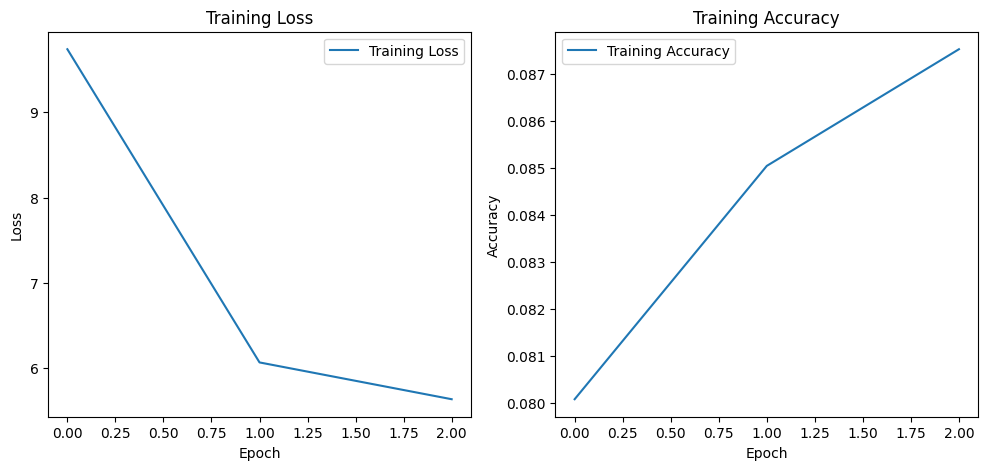

In [17]:
import torch
from torch import nn
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

class ConditionalGPT2(nn.Module):
    def __init__(self, model_name="distilgpt2", num_labels=11):
        super(ConditionalGPT2, self).__init__()
        self.gpt2 = GPT2LMHeadModel.from_pretrained(model_name, output_hidden_states=True)
        self.classification_head = nn.Linear(self.gpt2.config.n_embd, num_labels)
        
    def forward(self, input_ids, attention_mask=None, labels=None, classification_labels=None):
        # GPT-2 forward pass
        outputs = self.gpt2(input_ids, attention_mask=attention_mask, labels=labels, output_hidden_states=True)
        loss, logits, hidden_states = outputs.loss, outputs.logits, outputs.hidden_states

        # Classification head forward pass
        classification_logits = self.classification_head(hidden_states[-1].mean(dim=1))

        return loss, logits, classification_logits
    
    def resize_token_embeddings(self, new_num_tokens):
        self.gpt2.resize_token_embeddings(new_num_tokens)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = ConditionalGPT2().to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training settings
epochs = 3  # Adjust the number of epochs here

# Variables to store loss and accuracy
train_losses = []
train_accuracies = []

# Training loop
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        optimizer.zero_grad()

        loss, logits, classification_logits = model(input_ids, attention_mask=attention_mask, labels=target_ids)

        # Assuming classification_labels is provided in the batch
        classification_labels = torch.randint(0, 11, (input_ids.size(0),)).to(device)  # Random labels for example

        # Calculate classification loss
        classification_loss = nn.CrossEntropyLoss()(classification_logits, classification_labels)
        total_loss = loss + classification_loss

        total_loss.backward()
        optimizer.step()

        epoch_loss += total_loss.item()
        
        # Calculate accuracy
        _, preds = torch.max(classification_logits, dim=1)
        correct_predictions += torch.sum(preds == classification_labels)
        total_predictions += classification_labels.size(0)

    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions.double() / total_predictions

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy.item())

    print(f"Epoch {epoch + 1}, Loss: {avg_loss}, Accuracy: {accuracy}")

# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()


/home/ray/anaconda3/lib/python3.9/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1, Training Loss: 10.453631176668054, Training Accuracy: 0.09621353196772191
Epoch 1, Validation Loss: 8.597789691044735, Validation Accuracy: 0.08684863523573201


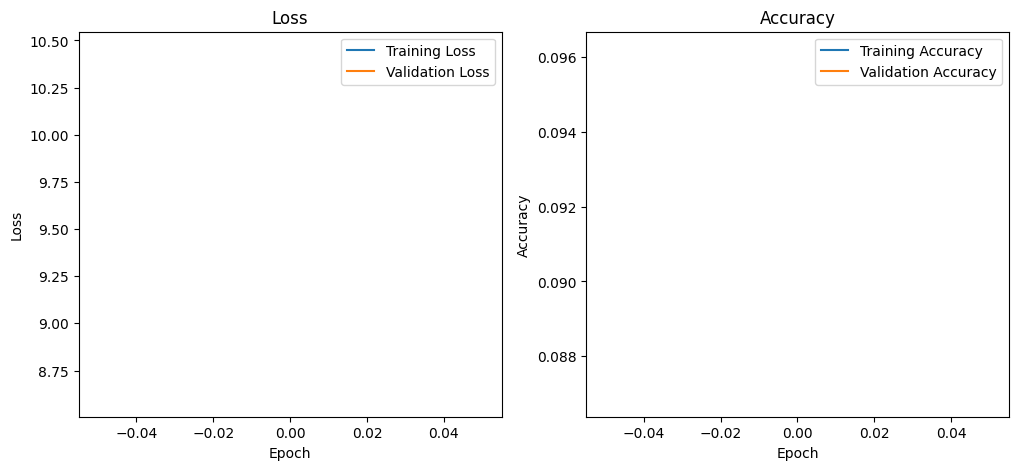

In [20]:
import torch
from torch import nn
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

class ConditionalGPT2(nn.Module):
    def __init__(self, model_name="distilgpt2", num_labels=11):
        super(ConditionalGPT2, self).__init__()
        self.gpt2 = GPT2LMHeadModel.from_pretrained(model_name, output_hidden_states=True)
        self.classification_head = nn.Linear(self.gpt2.config.n_embd, num_labels)
        
    def forward(self, input_ids, attention_mask=None, labels=None, classification_labels=None):
        # GPT-2 forward pass
        outputs = self.gpt2(input_ids, attention_mask=attention_mask, labels=labels, output_hidden_states=True)
        loss, logits, hidden_states = outputs.loss, outputs.logits, outputs.hidden_states

        # Classification head forward pass
        classification_logits = self.classification_head(hidden_states[-1].mean(dim=1))

        return loss, logits, classification_logits
    
    def resize_token_embeddings(self, new_num_tokens):
        self.gpt2.resize_token_embeddings(new_num_tokens)
    
    def generate(self, *args, **kwargs):
        return self.gpt2.generate(*args, **kwargs)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = ConditionalGPT2().to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=3e-3)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training settings
epochs = 1  # Increased number of epochs
learning_rate = 3e-3  # Adjusted learning rate

# Redefine the optimizer with the new learning rate
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Variables to store loss and accuracy
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training loop
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        optimizer.zero_grad()

        loss, logits, classification_logits = model(input_ids, attention_mask=attention_mask, labels=target_ids)

        # Assuming classification_labels is provided in the batch
        classification_labels = torch.randint(0, 11, (input_ids.size(0),)).to(device)  # Random labels for example

        # Calculate classification loss
        classification_loss = nn.CrossEntropyLoss()(classification_logits, classification_labels)
        total_loss = loss + classification_loss

        total_loss.backward()
        optimizer.step()

        epoch_loss += total_loss.item()
        
        # Calculate accuracy
        _, preds = torch.max(classification_logits, dim=1)
        correct_predictions += torch.sum(preds == classification_labels)
        total_predictions += classification_labels.size(0)

    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions.double() / total_predictions

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy.item())

    print(f"Epoch {epoch + 1}, Training Loss: {avg_loss}, Training Accuracy: {accuracy}")

    # Validation loop
    model.eval()
    val_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

            loss, logits, classification_logits = model(input_ids, attention_mask=attention_mask, labels=target_ids)

            classification_labels = torch.randint(0, 11, (input_ids.size(0),)).to(device)  # Random labels for example

            classification_loss = nn.CrossEntropyLoss()(classification_logits, classification_labels)
            total_loss = loss + classification_loss

            val_loss += total_loss.item()
            
            _, preds = torch.max(classification_logits, dim=1)
            correct_predictions += torch.sum(preds == classification_labels)
            total_predictions += classification_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct_predictions.double() / total_predictions

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy.item())

    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}")

# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [22]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=125):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,
        do_sample=True,
        top_k=1000,
        top_p=0.95,
        temperature=1.0
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences2 = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    
    # Alternate between "This patient has" and "This patient is"
    prompt = "This patient has " if index % 2 == 0 else "This patient is "
    
    synthetic_sentence2 = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=50)
    synthetic_sentences2.append(synthetic_sentence2)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_nodp1'] = synthetic_sentences2

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_bossep_nodp1_2014.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data_bossep_nodp1_2014.csv")

Synthetic sentences generated and saved to synthetic_data_bossep_nodp1_2014.csv


In [27]:
print(df.iloc[200]['extracted_text'])
#print(df.iloc[8]['synthetic_sentence'])
#print(df.iloc[8]['synthetic_sentence2'])
#print(df.iloc[100]['synthetic_sentence_dp_eps8'])
print(df.iloc[200]['synthetic_sentence_nodp1'])

Diffuse cortical volume loss, consistent with patient's age. ,5. Preliminary report was issued at the time of dictation.
[BOS]Radiology[SEP]This patient has  77[iovascularary white--RRoral[ with dil. is a l with She. usual patient the les in patient beenomy patient hem/rolog Gyosis


## Classifier Head and DP

In [34]:
import torch
from torch import nn
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from fastDP import PrivacyEngine  # Ensure FastDP is installed

class ConditionalGPT2(nn.Module):
    def __init__(self, model_name="distilgpt2", num_labels=11):
        super(ConditionalGPT2, self).__init__()
        self.gpt2 = GPT2LMHeadModel.from_pretrained(model_name, output_hidden_states=True)
        self.classification_head = nn.Linear(self.gpt2.config.n_embd, num_labels)
        
    def forward(self, input_ids, attention_mask=None, labels=None, classification_labels=None):
        # GPT-2 forward pass
        outputs = self.gpt2(input_ids, attention_mask=attention_mask, labels=labels, output_hidden_states=True)
        loss, logits, hidden_states = outputs.loss, outputs.logits, outputs.hidden_states

        # Classification head forward pass
        classification_logits = self.classification_head(hidden_states[-1].mean(dim=1))

        return loss, logits, classification_logits
    
    def resize_token_embeddings(self, new_num_tokens):
        self.gpt2.resize_token_embeddings(new_num_tokens)
    
    def generate(self, *args, **kwargs):
        return self.gpt2.generate(*args, **kwargs)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = ConditionalGPT2().to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

def collate_fn(batch):
    input_ids = torch.nn.utils.rnn.pad_sequence([item[0] for item in batch], batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_masks = torch.nn.utils.rnn.pad_sequence([item[1] for item in batch], batch_first=True, padding_value=0)
    target_ids = torch.nn.utils.rnn.pad_sequence([item[2] for item in batch], batch_first=True, padding_value=-100)
    return input_ids, attention_masks, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=32, collate_fn=collate_fn)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=32,
    sample_size=len(train_dataset),
    epochs=10,  # Increased number of epochs
    target_epsilon=2,
    #clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training settings
epochs = 10  # Adjust the number of epochs here
learning_rate = 3e-5  # Adjusted learning rate

# Redefine the optimizer with the new learning rate
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Variables to store loss and accuracy
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training loop
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        optimizer.zero_grad()

        loss, logits, classification_logits = model(input_ids, attention_mask=attention_mask, labels=target_ids)

        # Assuming classification_labels is provided in the batch
        classification_labels = torch.randint(0, 11, (input_ids.size(0),)).to(device)  # Random labels for example

        # Calculate classification loss
        classification_loss = nn.CrossEntropyLoss()(classification_logits, classification_labels)
        total_loss = loss + classification_loss

        total_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += total_loss.item()
        
        # Calculate accuracy
        _, preds = torch.max(classification_logits, dim=1)
        correct_predictions += torch.sum(preds == classification_labels)
        total_predictions += classification_labels.size(0)

    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions.double() / total_predictions

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy.item())

    print(f"Epoch {epoch + 1}, Training Loss: {avg_loss}, Training Accuracy: {accuracy}")

    # Validation loop
    model.eval()
    val_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

            loss, logits, classification_logits = model(input_ids, attention_mask=attention_mask, labels=target_ids)

            classification_labels = torch.randint(0, 11, (input_ids.size(0),)).to(device)  # Random labels for example

            classification_loss = nn.CrossEntropyLoss()(classification_logits, classification_labels)
            total_loss = loss + classification_loss

            val_loss += total_loss.item()
            
            _, preds = torch.max(classification_logits, dim=1)
            correct_predictions += torch.sum(preds == classification_labels)
            total_predictions += classification_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct_predictions.double() / total_predictions

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy.item())

    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}")

# Detach the PrivacyEngine
privacy_engine.detach()

# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()




/home/ray/anaconda3/lib/python3.9/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Number of trainable components:  79 ; Number of trainable layers:  41
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['gpt2.transformer.wte']


/home/ray/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


: 

: 

In [ ]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=50):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.7
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

In [30]:
import torch
from torch import nn
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from fastDP import PrivacyEngine  # Ensure FastDP is installed

class ConditionalGPT2(nn.Module):
    def __init__(self, model_name="distilgpt2", num_labels=11):
        super(ConditionalGPT2, self).__init__()
        self.gpt2 = GPT2LMHeadModel.from_pretrained(model_name, output_hidden_states=True)
        self.classification_head = nn.Linear(self.gpt2.config.n_embd, num_labels)
        
    def forward(self, input_ids, attention_mask=None, labels=None, classification_labels=None):
        # GPT-2 forward pass
        outputs = self.gpt2(input_ids, attention_mask=attention_mask, labels=labels, output_hidden_states=True)
        loss, logits, hidden_states = outputs.loss, outputs.logits, outputs.hidden_states

        # Classification head forward pass
        classification_logits = self.classification_head(hidden_states[-1].mean(dim=1))

        return loss, logits, classification_logits
    
    def resize_token_embeddings(self, new_num_tokens):
        self.gpt2.resize_token_embeddings(new_num_tokens)
    
    def generate(self, *args, **kwargs):
        return self.gpt2.generate(*args, **kwargs)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = ConditionalGPT2().to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=32,
    sample_size=len(train_dataset),
    epochs=6,  # Increased number of epochs
    target_epsilon=16,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training settings
epochs = 6  # Adjust the number of epochs here
learning_rate = 3e-3  # Adjusted learning rate

# Redefine the optimizer with the new learning rate
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Variables to store loss and accuracy
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training loop
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        optimizer.zero_grad()

        loss, logits, classification_logits = model(input_ids, attention_mask=attention_mask, labels=target_ids)

        # Assuming classification_labels is provided in the batch
        classification_labels = torch.randint(0, 11, (input_ids.size(0),)).to(device)  # Random labels for example

        # Calculate classification loss
        classification_loss = nn.CrossEntropyLoss()(classification_logits, classification_labels)
        total_loss = loss + classification_loss

        total_loss.backward()
        optimizer.step()

        epoch_loss += total_loss.item()
        
        # Calculate accuracy
        _, preds = torch.max(classification_logits, dim=1)
        correct_predictions += torch.sum(preds == classification_labels)
        total_predictions += classification_labels.size(0)

    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions.double() / total_predictions

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy.item())

    print(f"Epoch {epoch + 1}, Training Loss: {avg_loss}, Training Accuracy: {accuracy}")

    # Validation loop
    model.eval()
    val_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

            loss, logits, classification_logits = model(input_ids, attention_mask=attention_mask, labels=target_ids)

            classification_labels = torch.randint(0, 11, (input_ids.size(0),)).to(device)  # Random labels for example

            classification_loss = nn.CrossEntropyLoss()(classification_logits, classification_labels)
            total_loss = loss + classification_loss

            val_loss += total_loss.item()
            
            _, preds = torch.max(classification_logits, dim=1)
            correct_predictions += torch.sum(preds == classification_labels)
            total_predictions += classification_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct_predictions.double() / total_predictions

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy.item())

    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}")

# Detach the PrivacyEngine
privacy_engine.detach()

# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

Number of trainable components:  79 ; Number of trainable layers:  41
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['gpt2.transformer.wte']


RuntimeError: stack expects each tensor to be equal size, but got [32] at entry 0 and [1] at entry 1

In [31]:
import torch
from torch import nn
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from fastDP import PrivacyEngine  # Ensure FastDP is installed

class ConditionalGPT2(nn.Module):
    def __init__(self, model_name="distilgpt2", num_labels=11):
        super(ConditionalGPT2, self).__init__()
        self.gpt2 = GPT2LMHeadModel.from_pretrained(model_name, output_hidden_states=True)
        self.classification_head = nn.Linear(self.gpt2.config.n_embd, num_labels)
        
    def forward(self, input_ids, attention_mask=None, labels=None, classification_labels=None):
        # GPT-2 forward pass
        outputs = self.gpt2(input_ids, attention_mask=attention_mask, labels=labels, output_hidden_states=True)
        loss, logits, hidden_states = outputs.loss, outputs.logits, outputs.hidden_states

        # Classification head forward pass
        classification_logits = self.classification_head(hidden_states[-1].mean(dim=1))

        return loss, logits, classification_logits
    
    def resize_token_embeddings(self, new_num_tokens):
        self.gpt2.resize_token_embeddings(new_num_tokens)
    
    def generate(self, *args, **kwargs):
        return self.gpt2.generate(*args, **kwargs)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = ConditionalGPT2().to(device)
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"{self.labels[idx]}[SEP]"
        text = f"[BOS]{specialty_label}{self.texts[idx]}"

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

def collate_fn(batch):
    input_ids = torch.nn.utils.rnn.pad_sequence([item[0] for item in batch], batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_masks = torch.nn.utils.rnn.pad_sequence([item[1] for item in batch], batch_first=True, padding_value=0)
    target_ids = torch.nn.utils.rnn.pad_sequence([item[2] for item in batch], batch_first=True, padding_value=-100)
    return input_ids, attention_masks, target_ids

# Load your dataframe here
# df = pd.read_csv('your_data.csv')

# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=32, collate_fn=collate_fn)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=32,
    sample_size=len(train_dataset),
    epochs=10,  # Increased number of epochs
    target_epsilon=2,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training settings
epochs = 10  # Adjust the number of epochs here
learning_rate = 3e-5  # Adjusted learning rate

# Redefine the optimizer with the new learning rate
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Variables to store loss and accuracy
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training loop
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        optimizer.zero_grad()

        loss, logits, classification_logits = model(input_ids, attention_mask=attention_mask, labels=target_ids)

        # Assuming classification_labels is provided in the batch
        classification_labels = torch.randint(0, 11, (input_ids.size(0),)).to(device)  # Random labels for example

        # Calculate classification loss
        classification_loss = nn.CrossEntropyLoss()(classification_logits, classification_labels)
        total_loss = loss + classification_loss

        total_loss.backward()
        optimizer.step()

        epoch_loss += total_loss.item()
        
        # Calculate accuracy
        _, preds = torch.max(classification_logits, dim=1)
        correct_predictions += torch.sum(preds == classification_labels)
        total_predictions += classification_labels.size(0)

    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions.double() / total_predictions

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy.item())

    print(f"Epoch {epoch + 1}, Training Loss: {avg_loss}, Training Accuracy: {accuracy}")

    # Validation loop
    model.eval()
    val_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

            loss, logits, classification_logits = model(input_ids, attention_mask=attention_mask, labels=target_ids)

            classification_labels = torch.randint(0, 11, (input_ids.size(0),)).to(device)  # Random labels for example

            classification_loss = nn.CrossEntropyLoss()(classification_logits, classification_labels)
            total_loss = loss + classification_loss

            val_loss += total_loss.item()
            
            _, preds = torch.max(classification_logits, dim=1)
            correct_predictions += torch.sum(preds == classification_labels)
            total_predictions += classification_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct_predictions.double() / total_predictions

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy.item())

    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}")

# Detach the PrivacyEngine
privacy_engine.detach()

# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()


Number of trainable components:  79 ; Number of trainable layers:  41
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['gpt2.transformer.wte']


RuntimeError: stack expects each tensor to be equal size, but got [32] at entry 0 and [1] at entry 1

In [ ]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt, max_length=50):
    model.eval()
    specialty_label = f"{label}[SEP]"
    input_ids = tokenizer.encode(f"[BOS]{specialty_label}{prompt}", return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.7
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence
    
# Generate synthetic sentences for each row in the dataframe
synthetic_sentences2 = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    
    # Alternate between "This patient has" and "This patient is"
    prompt = "This patient has " if index % 2 == 0 else "This patient is "
    
    synthetic_sentence2 = generate_synthetic_sentence(model, tokenizer, specialty, prompt, max_length=50)
    synthetic_sentences2.append(synthetic_sentence2)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence_nodp1'] = synthetic_sentences2

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_bossep_nodp1_2014.csv', index=False)

print("


## Try out gpt 2 (instead of distilgpt 2 and 8 epochs)
* 22 min for a single epoch, 42 min for second epoch 
* x minutes for 8 epochs

In [54]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from fastDP import PrivacyEngine  # Ensure fastDP is installed

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"Specialty: {self.labels[idx]} "
        text = specialty_label + self.texts[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids


# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=32,  # Adjusted batch size for memory constraints
    sample_size=len(train_dataset),
    epochs=8,  # Increased epochs
    target_epsilon=8,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training loop
for epoch in range(8):  # Increase epochs if needed
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Detach and save the privacy engine state
privacy_engine.detach()

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt="", max_length=50):
    model.eval()
    specialty_label = f"Specialty: {label} "
    input_ids = tokenizer.encode(specialty_label + prompt, return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_new_tokens=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=0.7  # Adding temperature to control randomness
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences4 = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    extracted_text = row['extracted_text']
    prompt = extracted_text[len(extracted_text)//2:]  # Use the second half of the prompt
    synthetic_sentence_4 = generate_synthetic_sentence(model, tokenizer, specialty, prompt=prompt, max_length=50)
    synthetic_sentences4.append(synthetic_sentence4)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence4'] = synthetic_sentences4

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_gpt2.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Number of trainable components:  149 ; Number of trainable layers:  76
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']


/home/ray/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.
Epoch 6 completed.
Epoch 7 completed.
Epoch 8 completed.


NameError: name 'synthetic_sentences4' is not defined

In [56]:
# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt="", max_length=50):
    model.eval()
    specialty_label = f"Specialty: {label} "
    input_ids = tokenizer.encode(specialty_label + prompt, return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_new_tokens=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=0.7  # Adding temperature to control randomness
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences4 = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    extracted_text = row['extracted_text']
    prompt = extracted_text[len(extracted_text)//2:]  # Use the second half of the prompt
    synthetic_sentence4 = generate_synthetic_sentence(model, tokenizer, specialty, prompt=prompt, max_length=50)
    synthetic_sentences4.append(synthetic_sentence4)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence4'] = synthetic_sentences4

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_gpt2.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")

Synthetic sentences generated and saved to synthetic_data.csv


In [61]:
print(df.iloc[1]['extracted_text'])
print(df.iloc[1]['synthetic_sentence'])
print(df.iloc[1]['synthetic_sentence2'])
print(df.iloc[1]['synthetic_sentence3'])
print(df.iloc[1]['synthetic_sentence4'])


This is a 91-year-old male with a previous history of working in the coalmine and significant exposure to silica with resultant pneumoconiosis and fibrosis of the lung. The patient also has a positive history of smoking in the past.
Specialty: Cardiovascular / Pulmonary This is a 91-year-old male with a previous history of working in the coalmine and significant exposure to silica with resultant pneumoconiosis and fibrosis of the lung. The patient also has a positive history of smoking in the past. I have had a very small heart rate, pulmonary hypertension or pulmonary bronchoscopy. My chest is low at this time and a slight loss in volume of air mass and breath rate. When breathing is normal, my upper body is at the moment
Specialty: Cardiovascular / Pulmonary h resultant pneumoconiosis and fibrosis of the lung. The patient also has a positive history of smoking in the past. lung lungs pulmonary respiratory bron air and heart asthma.
 breathing- oxygen chest throat airflow breath, is o

In [57]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier_gpt2"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to ./trained_model_with_classifier_gpt2


# Try out GPT-2 Medium with DP 4 epochs 

In [11]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from fastDP import PrivacyEngine  # Ensure fastDP is installed

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model = GPT2LMHeadModel.from_pretrained('gpt2-medium').to(device)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium')

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=5e-5)

# Dataset class for multi-class classification
class MedicalSpecialtyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        specialty_label = f"Specialty: {self.labels[idx]} "
        text = specialty_label + self.texts[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids


# Extract texts and labels from the dataframe
texts = df['extracted_text'].tolist()
labels = df['medical_specialty'].tolist()

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = MedicalSpecialtyDataset(train_texts, train_labels, tokenizer)
val_dataset = MedicalSpecialtyDataset(val_texts, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=32,  # Adjusted batch size for memory constraints
    sample_size=len(train_dataset),
    epochs=4,  # Increased epochs
    target_epsilon=3,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Training loop
for epoch in range(4):  # Increase epochs if needed
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Detach and save the privacy engine state
privacy_engine.detach()

# Function to generate synthetic sentences with medical specialty label
def generate_synthetic_sentence(model, tokenizer, label, prompt="", max_length=50):
    model.eval()
    specialty_label = f"Specialty: {label} "
    input_ids = tokenizer.encode(specialty_label + prompt, return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_new_tokens=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=0.7  # Adding temperature to control randomness
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences for each row in the dataframe
synthetic_sentences5 = []
for index, row in df.iterrows():
    specialty = row['medical_specialty']
    extracted_text = row['extracted_text']
    prompt = extracted_text[len(extracted_text)//2:]  # Use the second half of the prompt
    synthetic_sentence5 = generate_synthetic_sentence(model, tokenizer, specialty, prompt=prompt, max_length=50)
    synthetic_sentences5.append(synthetic_sentence5)

# Append the synthetic sentences to the dataframe
df['synthetic_sentence5'] = synthetic_sentences5

# Save the dataframe with the synthetic sentences
df.to_csv('synthetic_data_gpt2_medium.csv', index=False)

print("Synthetic sentences generated and saved to synthetic_data.csv")

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Number of trainable components:  293 ; Number of trainable layers:  148
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['transformer.wte']


/home/ray/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Synthetic sentences generated and saved to synthetic_data.csv


In [13]:
print(df.iloc[1]['extracted_text'])
#print(df.iloc[1]['synthetic_sentence'])
#print(df.iloc[1]['synthetic_sentence2'])
#print(df.iloc[1]['synthetic_sentence3'])
#print(df.iloc[1]['synthetic_sentence4'])
print(df.iloc[1]['synthetic_sentence5'])

This is a 91-year-old male with a previous history of working in the coalmine and significant exposure to silica with resultant pneumoconiosis and fibrosis of the lung. The patient also has a positive history of smoking in the past.
Specialty: Cardiovascular / Pulmonary h resultant pneumoconiosis and fibrosis of the lung. The patient also has a positive history of smoking in the past.
"-,—'s is the " and It to. "The of' The I We D M;D/


In [14]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier_gpt2_medium"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to ./trained_model_with_classifier_gpt2_medium


print(df.iloc[1]['extracted_text'])
print(df.iloc[1]['synthetic_sentence'])
print(df.iloc[1]['synthetic_sentence2'])
print(df.iloc[1]['synthetic_sentence3'])
print(df.iloc[1]['synthetic_sentence4'])
print(df.iloc[1]['synthetic_sentence5'])

## Try Out to have FastDP matched with LLama 3

In [3]:
from huggingface_hub import login
login()

## Note

* Llama 3 seems to run with the Privacy Engine on 32GB CPU - 128GB
* After running for 15 min it has not finished its first epoch yet 

In [12]:
import torch
import torch.nn.functional as F
from torch.optim import SGD
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from fastDP import PrivacyEngine

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model and tokenizer
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
pipe = pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

tokenizer = pipe.tokenizer
model = pipe.model.to(device)

# Define the optimizer
optimizer = SGD(model.parameters(), lr=0.05)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=8,  # Adjusted batch size for memory constraints
    sample_size=50000,
    epochs=3,
    target_epsilon=2,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Example training pipeline
# Assuming `batch` and `labels` are your input tensors and target labels respectively
# For this example, we'll create dummy data
batch = torch.randint(0, model.config.vocab_size, (8, 512), dtype=torch.long).to(device)  # Adjusted batch size
labels = torch.randint(0, model.config.vocab_size, (8, 512), dtype=torch.long).to(device)  # Adjusted batch size

# Standard training loop
outputs = model(batch, labels=labels)
loss = outputs.loss
loss.backward()
optimizer.step()
optimizer.zero_grad()

print("Training step completed successfully.")


/home/ray/anaconda3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Number of trainable components:  226 ; Number of trainable layers:  226
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['model.embed_tokens']


/home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


['model.layers.0.input_layernorm.weight', 'model.layers.0.post_attention_layernorm.weight', 'model.layers.1.input_layernorm.weight', 'model.layers.1.post_attention_layernorm.weight', 'model.layers.2.input_layernorm.weight', 'model.layers.2.post_attention_layernorm.weight', 'model.layers.3.input_layernorm.weight', 'model.layers.3.post_attention_layernorm.weight', 'model.layers.4.input_layernorm.weight', 'model.layers.4.post_attention_layernorm.weight', 'model.layers.5.input_layernorm.weight', 'model.layers.5.post_attention_layernorm.weight', 'model.layers.6.input_layernorm.weight', 'model.layers.6.post_attention_layernorm.weight', 'model.layers.7.input_layernorm.weight', 'model.layers.7.post_attention_layernorm.weight', 'model.layers.8.input_layernorm.weight', 'model.layers.8.post_attention_layernorm.weight', 'model.layers.9.input_layernorm.weight', 'model.layers.9.post_attention_layernorm.weight', 'model.layers.10.input_layernorm.weight', 'model.layers.10.post_attention_layernorm.weigh

KeyboardInterrupt: 

* aFter 2 hours of running the code below, has not finished first epoch 

In [4]:
import torch
import torch.nn.functional as F
from torch.optim import SGD, Adam
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from fastDP import PrivacyEngine
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model and tokenizer
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
pipe = pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

tokenizer = pipe.tokenizer
model = pipe.model.to(device)

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the optimizer
optimizer = Adam(model.parameters(), lr=5e-5)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=8,  # Adjusted batch size for memory constraints
    sample_size=400,
    epochs=3,  # Adjusted epochs
    target_epsilon=2,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Dummy dataset
class SentimentDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_length=512):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        # Prepend the label to the sentence
        sentiment_label = "Positive: " if self.labels[idx] == 1 else "Negative: "
        text = sentiment_label + self.sentences[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token

        return input_ids, attention_mask, target_ids

# Assume `data` is a list of sentences and `labels` is a list of sentiment labels
# For demonstration purposes, we'll create a more diverse and realistic dataset
data = [
    "I love this product because it is fantastic and works perfectly.",
    "This is the worst purchase I have ever made, it is horrible.",
    "I'm extremely happy with this item, it exceeded my expectations.",
    "I regret buying this, it is completely useless.",
    "This product is amazing! It has made my life so much easier.",
    "Absolutely terrible, I will never buy this again.",
    "This is the best thing I have ever purchased, highly recommend it!",
    "It broke after one use, very disappointed.",
    "I am so satisfied with this purchase, it is everything I wanted.",
    "Not worth the money, very low quality."
] * 100
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0] * 100

# Split data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = SentimentDataset(train_data, train_labels, tokenizer)
val_dataset = SentimentDataset(val_data, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # Adjusted batch size
val_loader = DataLoader(val_dataset, batch_size=8)

# Training loop
for epoch in range(3):  # Adjusted epochs
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask, labels=target_ids)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed.")

# Function to generate synthetic sentences with sentiment label
def generate_synthetic_sentence(model, tokenizer, label, prompt="Write a sentence that expresses a ", max_length=50):
    model.eval()
    sentiment_label = "positive sentiment." if label == 1 else "negative sentiment."
    full_prompt = prompt + sentiment_label
    input_ids = tokenizer.encode(full_prompt, return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,  # Avoid repeating n-grams
        do_sample=True,  # Enable sampling
        top_k=50,  # Top-k sampling
        top_p=0.95,  # Top-p sampling (nucleus sampling)
        temperature=0.7  # Adjust temperature for more randomness
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences
synthetic_sentences = []
for label in [0, 1]:
    sentence = generate_synthetic_sentence(model, tokenizer, label)
    synthetic_sentences.append((sentence, label))

print("Synthetic sentences generated:", synthetic_sentences)


/home/ray/anaconda3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Number of trainable components:  226 ; Number of trainable layers:  226
>>>>>>>>>>>>>>>>> Applying  automatic  per-sample gradient clipping.
>>>>>>>>>>>>>>>>> Block heads for per-sample gradient clipping are defined as: ['model.embed_tokens']


/home/ray/anaconda3/lib/python3.10/site-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


['model.layers.0.input_layernorm.weight', 'model.layers.0.post_attention_layernorm.weight', 'model.layers.1.input_layernorm.weight', 'model.layers.1.post_attention_layernorm.weight', 'model.layers.2.input_layernorm.weight', 'model.layers.2.post_attention_layernorm.weight', 'model.layers.3.input_layernorm.weight', 'model.layers.3.post_attention_layernorm.weight', 'model.layers.4.input_layernorm.weight', 'model.layers.4.post_attention_layernorm.weight', 'model.layers.5.input_layernorm.weight', 'model.layers.5.post_attention_layernorm.weight', 'model.layers.6.input_layernorm.weight', 'model.layers.6.post_attention_layernorm.weight', 'model.layers.7.input_layernorm.weight', 'model.layers.7.post_attention_layernorm.weight', 'model.layers.8.input_layernorm.weight', 'model.layers.8.post_attention_layernorm.weight', 'model.layers.9.input_layernorm.weight', 'model.layers.9.post_attention_layernorm.weight', 'model.layers.10.input_layernorm.weight', 'model.layers.10.post_attention_layernorm.weigh

KeyboardInterrupt: 

## Try Out with Mixtral 8x7b

In [8]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model_id = "mistralai/Mixtral-8x7B-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id).to(device)

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/92.7k [00:00<?, ?B/s]

model-00001-of-00019.safetensors:   0%|          | 0.00/4.89G [00:00<?, ?B/s]

model-00002-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [3]:
import torch
import torch.nn.functional as F
from torch.optim import SGD
from transformers import AutoModelForCausalLM, AutoTokenizer
from fastDP import PrivacyEngine

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model and tokenizer, and move the model to the specified device
model_id = "mistralai/Mixtral-8x7B-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id).to(device)

# Define the optimizer
optimizer = SGD(model.parameters(), lr=0.05)

# Define the PrivacyEngine
privacy_engine = PrivacyEngine(
    model,
    batch_size=16,  # Further adjusted batch size for memory constraints
    sample_size=50000,
    epochs=3,
    target_epsilon=2,
    clipping_fn='automatic',
    clipping_mode='MixOpt',
    origin_params=None,
    clipping_style='all-layer',
)

# Attach the PrivacyEngine to the optimizer
privacy_engine.attach(optimizer)

# Example training pipeline
# Assuming `batch` and `labels` are your input tensors and target labels respectively
# For this example, we'll create dummy data
batch = torch.randint(0, model.config.vocab_size, (16, 512), dtype=torch.long).to(device)  # Adjusted batch size
labels = torch.randint(0, model.config.vocab_size, (16, 512), dtype=torch.long).to(device)  # Adjusted batch size

# Standard training loop
outputs = model(batch)
loss = F.cross_entropy(outputs.logits.view(-1, model.config.vocab_size), labels.view(-1))
loss.backward()
optimizer.step()
optimizer.zero_grad()

print("Training step completed successfully.")


/home/ray/anaconda3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/92.7k [00:00<?, ?B/s]

model-00001-of-00019.safetensors:   0%|          | 0.00/4.89G [00:00<?, ?B/s]

model-00002-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00005-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00006-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00007-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00008-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00009-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00010-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00011-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00012-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

## Classifier Header and LLM combined 

In [3]:
!pip install scikit-learn torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 101.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 41.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Found credentials from IAM Role: cld_8stzu32z64efckgcwt2im26scn-cluster-node-role


In [4]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model and tokenizer
model_id = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_id)
model = GPT2LMHeadModel.from_pretrained(model_id).to(device)

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the classifier head
class ClassifierHead(torch.nn.Module):
    def __init__(self, hidden_size, num_labels):
        super(ClassifierHead, self).__init__()
        self.dense = torch.nn.Linear(hidden_size, hidden_size)
        self.dropout = torch.nn.Dropout(0.1)
        self.out_proj = torch.nn.Linear(hidden_size, num_labels)

    def forward(self, features, **kwargs):
        x = self.dense(features)
        x = torch.nn.functional.relu(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

# Attach classifier head to the model
class GPT2WithClassifier(torch.nn.Module):
    def __init__(self, model, num_labels):
        super(GPT2WithClassifier, self).__init__()
        self.transformer = model.transformer
        self.lm_head = model.lm_head
        self.classifier = ClassifierHead(model.config.n_embd, num_labels)

    def forward(self, input_ids, attention_mask=None, labels=None, cls_labels=None):
        transformer_outputs = self.transformer(input_ids, attention_mask=attention_mask)
        hidden_states = transformer_outputs[0]
        
        lm_logits = self.lm_head(hidden_states)
        cls_logits = self.classifier(hidden_states[:, 0, :])  # Use [CLS] token for classification
        
        outputs = (lm_logits, cls_logits)
        
        if labels is not None and cls_labels is not None:
            loss_fct = torch.nn.CrossEntropyLoss()
            lm_loss = loss_fct(lm_logits.view(-1, lm_logits.size(-1)), labels.view(-1))
            cls_loss = loss_fct(cls_logits.view(-1, cls_logits.size(-1)), cls_labels.view(-1))
            loss = lm_loss + cls_loss
            outputs = (loss,) + outputs
        
        return outputs
    
    def generate(self, *args, **kwargs):
        return self.transformer.generate(*args, **kwargs)

num_labels = 2  # For binary classification (positive/negative)
model_with_classifier = GPT2WithClassifier(model, num_labels).to(device)

# Define the optimizer
optimizer = Adam(model_with_classifier.parameters(), lr=5e-5)

# Dummy dataset
class SentimentDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_length=512):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        # Prepend the label to the sentence
        sentiment_label = "Positive: " if self.labels[idx] == 1 else "Negative: "
        text = sentiment_label + self.sentences[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()
        
        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token
        
        return input_ids, attention_mask, target_ids, torch.tensor(self.labels[idx], dtype=torch.long)

# Example data
data = [
    "I love this product because it is fantastic and works perfectly.",
    "This is the worst purchase I have ever made, it is horrible.",
    "I'm extremely happy with this item, it exceeded my expectations.",
    "I regret buying this, it is completely useless.",
    "This product is amazing! It has made my life so much easier.",
    "Absolutely terrible, I will never buy this again.",
    "This is the best thing I have ever purchased, highly recommend it!",
    "It broke after one use, very disappointed.",
    "I am so satisfied with this purchase, it is everything I wanted.",
    "Not worth the money, very low quality."
] * 100
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0] * 100

# Split data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = SentimentDataset(train_data, train_labels, tokenizer)
val_dataset = SentimentDataset(val_data, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Training loop
for epoch in range(3):
    model_with_classifier.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids, cls_labels = [x.to(device) for x in batch]

        outputs = model_with_classifier(input_ids, attention_mask=attention_mask, labels=target_ids, cls_labels=cls_labels)
        loss = outputs[0]

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed. Loss: {loss.item()}")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Epoch 1 completed. Loss: 0.6602942943572998
Epoch 2 completed. Loss: 0.08503400534391403
Epoch 3 completed. Loss: 0.0816885232925415


In [8]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model and tokenizer
model_id = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_id)
model = GPT2LMHeadModel.from_pretrained(model_id).to(device)

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the classifier head
class ClassifierHead(torch.nn.Module):
    def __init__(self, hidden_size, num_labels):
        super(ClassifierHead, self).__init__()
        self.dense = torch.nn.Linear(hidden_size, hidden_size)
        self.dropout = torch.nn.Dropout(0.1)
        self.out_proj = torch.nn.Linear(hidden_size, num_labels)

    def forward(self, features, **kwargs):
        x = self.dense(features)
        x = torch.nn.functional.relu(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

# Attach classifier head to the model
class GPT2WithClassifier(torch.nn.Module):
    def __init__(self, model, num_labels):
        super(GPT2WithClassifier, self).__init__()
        self.transformer = model.transformer
        self.lm_head = model.lm_head
        self.classifier = ClassifierHead(model.config.n_embd, num_labels)

    def forward(self, input_ids, attention_mask=None, labels=None, cls_labels=None):
        transformer_outputs = self.transformer(input_ids, attention_mask=attention_mask)
        hidden_states = transformer_outputs[0]
        
        lm_logits = self.lm_head(hidden_states)
        cls_logits = self.classifier(hidden_states[:, 0, :])  # Use [CLS] token for classification
        
        outputs = (lm_logits, cls_logits)
        
        if labels is not None and cls_labels is not None:
            loss_fct = torch.nn.CrossEntropyLoss()
            lm_loss = loss_fct(lm_logits.view(-1, lm_logits.size(-1)), labels.view(-1))
            cls_loss = loss_fct(cls_logits.view(-1, cls_logits.size(-1)), cls_labels.view(-1))
            loss = lm_loss + cls_loss
            outputs = (loss,) + outputs
        
        return outputs
    
    def generate(self, *args, **kwargs):
        return self.transformer.generate(*args, **kwargs)

num_labels = 2  # For binary classification (positive/negative)
model_with_classifier = GPT2WithClassifier(model, num_labels).to(device)

# Define the optimizer
optimizer = Adam(model_with_classifier.parameters(), lr=5e-5)

# Dummy dataset
class SentimentDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_length=512):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        # Prepend the label to the sentence
        sentiment_label = "Positive: " if self.labels[idx] == 1 else "Negative: "
        text = sentiment_label + self.sentences[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()
        
        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token
        
        return input_ids, attention_mask, target_ids, torch.tensor(self.labels[idx], dtype=torch.long)

# Example data
data = [
    "I love this product because it is fantastic and works perfectly.",
    "This is the worst purchase I have ever made, it is horrible.",
    "I'm extremely happy with this item, it exceeded my expectations.",
    "I regret buying this, it is completely useless.",
    "This product is amazing! It has made my life so much easier.",
    "Absolutely terrible, I will never buy this again.",
    "This is the best thing I have ever purchased, highly recommend it!",
    "It broke after one use, very disappointed.",
    "I am so satisfied with this purchase, it is everything I wanted.",
    "Not worth the money, very low quality."
] * 100
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0] * 100

# Split data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = SentimentDataset(train_data, train_labels, tokenizer)
val_dataset = SentimentDataset(val_data, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Training loop
for epoch in range(3):
    model_with_classifier.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids, cls_labels = [x.to(device) for x in batch]

        outputs = model_with_classifier(input_ids, attention_mask=attention_mask, labels=target_ids, cls_labels=cls_labels)
        loss = outputs[0]

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed. Loss: {loss.item()}")



Epoch 1 completed. Loss: 0.6073985695838928
Epoch 2 completed. Loss: 0.08109154552221298
Epoch 3 completed. Loss: 0.01457744836807251


In [9]:
# Define the directory to save the model and tokenizer
save_directory = "./trained_model_with_classifier"

# Create the directory if it does not exist
import os
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save the model
model_with_classifier.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")


AttributeError: 'GPT2WithClassifier' object has no attribute 'save_pretrained'

In [2]:
import os 
import torch
import torch.nn.functional as F
from torch.optim import Adam
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

[2024-06-02 13:29:26,080] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [4]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model and tokenizer
model_id = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_id)
model = GPT2LMHeadModel.from_pretrained(model_id).to(device)

# Add a padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Define the classifier head
class ClassifierHead(torch.nn.Module):
    def __init__(self, hidden_size, num_labels):
        super(ClassifierHead, self).__init__()
        self.dense = torch.nn.Linear(hidden_size, hidden_size)
        self.dropout = torch.nn.Dropout(0.1)
        self.out_proj = torch.nn.Linear(hidden_size, num_labels)

    def forward(self, features, **kwargs):
        x = self.dense(features)
        x = torch.nn.functional.relu(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

# Attach classifier head to the model
class GPT2WithClassifier(torch.nn.Module):
    def __init__(self, model, num_labels):
        super(GPT2WithClassifier, self).__init__()
        self.transformer = model.transformer
        self.lm_head = model.lm_head
        self.classifier = ClassifierHead(model.config.n_embd, num_labels)

    def forward(self, input_ids, attention_mask=None, labels=None, cls_labels=None):
        transformer_outputs = self.transformer(input_ids, attention_mask=attention_mask)
        hidden_states = transformer_outputs[0]
        
        lm_logits = self.lm_head(hidden_states)
        cls_logits = self.classifier(hidden_states[:, 0, :])  # Use [CLS] token for classification
        
        outputs = (lm_logits, cls_logits)
        
        if labels is not None and cls_labels is not None:
            loss_fct = torch.nn.CrossEntropyLoss()
            lm_loss = loss_fct(lm_logits.view(-1, lm_logits.size(-1)), labels.view(-1))
            cls_loss = loss_fct(cls_logits.view(-1, cls_logits.size(-1)), cls_labels.view(-1))
            loss = lm_loss + cls_loss
            outputs = (loss,) + outputs
        
        return outputs
    
    def generate(self, *args, **kwargs):
        return self.transformer.generate(*args, **kwargs)
    
    def save_pretrained(self, save_directory):
        # Save the transformer model
        self.transformer.save_pretrained(save_directory)
        # Save the classifier head separately
        classifier_head_path = os.path.join(save_directory, 'classifier_head.pth')
        torch.save(self.classifier.state_dict(), classifier_head_path)
    
    @classmethod
    def from_pretrained(cls, pretrained_model_name_or_path, num_labels, *model_args, **kwargs):
        # Load the transformer model
        model = GPT2LMHeadModel.from_pretrained(pretrained_model_name_or_path, *model_args, **kwargs)
        # Initialize the custom model
        model_with_classifier = cls(model, num_labels)
        # Load the classifier head separately
        classifier_head_path = os.path.join(pretrained_model_name_or_path, 'classifier_head.pth')
        model_with_classifier.classifier.load_state_dict(torch.load(classifier_head_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
        return model_with_classifier

num_labels = 2  # For binary classification (positive/negative)
model_with_classifier = GPT2WithClassifier(model, num_labels).to(device)

# Define the optimizer
optimizer = Adam(model_with_classifier.parameters(), lr=5e-5)

# Dummy dataset
class SentimentDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_length=512):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        # Prepend the label to the sentence
        sentiment_label = "Positive: " if self.labels[idx] == 1 else "Negative: "
        text = sentiment_label + self.sentences[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()
        
        # The target is the same as input_ids but shifted by one position
        target_ids = input_ids.clone()
        target_ids[target_ids == self.tokenizer.pad_token_id] = -100  # Ignore padding token
        
        return input_ids, attention_mask, target_ids, torch.tensor(self.labels[idx], dtype=torch.long)

# Example data
data = [
    "I love this product because it is fantastic and works perfectly.",
    "This is the worst purchase I have ever made, it is horrible.",
    "I'm extremely happy with this item, it exceeded my expectations.",
    "I regret buying this, it is completely useless.",
    "This product is amazing! It has made my life so much easier.",
    "Absolutely terrible, I will never buy this again.",
    "This is the best thing I have ever purchased, highly recommend it!",
    "It broke after one use, very disappointed.",
    "I am so satisfied with this purchase, it is everything I wanted.",
    "Not worth the money, very low quality."
] * 100
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0] * 100

# Split data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2)

# Create Datasets and DataLoaders
train_dataset = SentimentDataset(train_data, train_labels, tokenizer)
val_dataset = SentimentDataset(val_data, val_labels, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Training loop
for epoch in range(3):
    model_with_classifier.train()
    for batch in train_loader:
        input_ids, attention_mask, target_ids, cls_labels = [x.to(device) for x in batch]

        outputs = model_with_classifier(input_ids, attention_mask=attention_mask, labels=target_ids, cls_labels=cls_labels)
        loss = outputs[0]

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed. Loss: {loss.item()}")

# Saving the model
save_directory = "./trained_model_with_classifier"
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

model_with_classifier.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

/home/ray/anaconda3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
def load_model_and_tokenizer(model_path):
    # Define the number of labels based on your classifier configuration
    num_labels = 2  # Update this if your model uses a different number of labels

    # Load the tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained(model_path)

    # Load the custom model
    model_with_classifier = GPT2WithClassifier.from_pretrained(model_path, num_labels)
    model_with_classifier.eval()  # Set the model to evaluation mode

    return model_with_classifier, tokenizer

# Load the model and tokenizer
model_path = "/home/ray/default/fastDP/trained_model_with_classifier"
model_with_classifier, tokenizer = load_model_and_tokenizer(model_path)
print("Model and tokenizer have been loaded successfully.")


NameError: name 'GPT2WithClassifier' is not defined

In [7]:
class GPT2WithClassifier(torch.nn.Module):
    def __init__(self, model, num_labels):
        super(GPT2WithClassifier, self).__init__()
        self.transformer = model.transformer
        self.lm_head = model.lm_head
        self.classifier = ClassifierHead(model.config.n_embd, num_labels)

    def forward(self, input_ids, attention_mask=None, labels=None, cls_labels=None):
        transformer_outputs = self.transformer(input_ids, attention_mask=attention_mask)
        hidden_states = transformer_outputs[0]
        lm_logits = self.lm_head(hidden_states)
        cls_logits = self.classifier(hidden_states[:, 0, :])
        return (lm_logits, cls_logits)

    def generate(self, *args, **kwargs):
        return self.lm_head.generate(*args, **kwargs)


In [8]:
import torch

# Assuming 'device' is already defined, typically as:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def generate_synthetic_sentence(model, tokenizer, label, prompt="Write a sentence that expresses a ", max_length=50):
    model.eval()
    sentiment_label = "positive sentiment." if label == 1 else "negative sentiment."
    full_prompt = prompt + sentiment_label
    input_ids = tokenizer.encode(full_prompt, return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.7
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences
synthetic_sentences = []
for label in [0, 1]:
    sentence = generate_synthetic_sentence(model_with_classifier, tokenizer, label)
    synthetic_sentences.append((sentence, label))

print("Synthetic sentences generated:", synthetic_sentences)


TypeError: The current model class (GPT2Model) is not compatible with `.generate()`, as it doesn't have a language model head. Please use one of the following classes instead: {'GPT2LMHeadModel'}

In [ ]:
# Function to generate synthetic sentences with sentiment label
def generate_synthetic_sentence(model, tokenizer, label, prompt="Write a sentence that expresses a ", max_length=50):
    model.eval()
    sentiment_label = "positive sentiment." if label == 1 else "negative sentiment."
    full_prompt = prompt + sentiment_label
    input_ids = tokenizer.encode(full_prompt, return_tensors='pt').to(device)
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.pad_token_id,
        no_repeat_ngram_size=2,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.7
    )
    generated_sentence = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_sentence

# Generate synthetic sentences
synthetic_sentences = []
for label in [0, 1]:
    sentence = generate_synthetic_sentence(model_with_classifier, tokenizer, label)
    synthetic_sentences.append((sentence, label))

print("Synthetic sentences generated:", synthetic_sentences)


In [2]:
import pandas as pd

In [12]:
path = '/home/ray/default/rss@vtti.com/synthetic_data_bossep_dp.csv'
df = pd.read_csv(path)
df.head()

,transcription,transcription_OG,medical_specialty,masked_transcriptions,pii_masked_transcriptions,masked_transcriptions_OG,pii_masked_transcriptions_OG,age_related_sentence,extracted_text,synthetic_sentence2
0,reason consultation mesothelioma history prese...,"REASON FOR CONSULTATION: , Mesothelioma.,HISTO...",Cardiovascular / Pulmonary,reason consultation[DISEASE_DISORDER] history ...,reason consultation[DISEASE_DISORDER] history ...,"REASON FOR CONSULTATION: , Mesothelioma.,HISTO...","REASON FOR CONSULTATION: , Mesothelioma.,HISTO...","HISTORY OF PRESENT ILLNESS: , The patient is a...",The patient is a 73-year-old pleasant Caucasia...,[BOS]Cardiovascular / Pulmonary[SEP] cardiovas...
1,history present illness 91yearold male previou...,"HISTORY OF PRESENT ILLNESS: , This is a 91-yea...",Cardiovascular / Pulmonary,history present illness[AGE][SEX] previous his...,history present illness[AGE][SEX] previous his...,"HISTORY OF PRESENT ILLNESS: , This is a 91-yea...","HISTORY OF PRESENT ILLNESS: , This is a 91-yea...","HISTORY OF PRESENT ILLNESS: , This is a 91-yea...",This is a 91-year-old male with a previous his...,[BOS]Cardiovascular / Pulmonary[SEP] cardiac c...
2,preoperative diagnosis left adrenal mass 55 cm...,"PREOPERATIVE DIAGNOSIS: , Left adrenal mass, 5...",Cardiovascular / Pulmonary,preoperative diagnosis left[DISEASE_DISORDER][...,preoperative diagnosis left[DISEASE_DISORDER][...,"PREOPERATIVE DIAGNOSIS: , Left adrenal mass, 5...","PREOPERATIVE DIAGNOSIS: , Left adrenal mass, 5...","HISTORY:, This is a 57-year-old female who wa...",This is a 57-year-old female who was found to ...,[BOS]Cardiovascular / Pulmonary[SEP] pulmonary...
3,history present illness patient 68yearold man ...,"HISTORY OF PRESENT ILLNESS:, The patient is a...",Cardiovascular / Pulmonary,history present illness patient[AGE][SEX] retu...,history present illness patient[AGE][SEX] retu...,"HISTORY OF PRESENT ILLNESS:, The patient is a...","HISTORY OF PRESENT ILLNESS:, The patient is a...","HISTORY OF PRESENT ILLNESS:, The patient is a...",The patient is a 68-year-old man who returns f...,[BOS]Cardiovascular / Pulmonary[SEP] cholester...
4,subjective patient 78yearold female problem es...,"SUBJECTIVE:, The patient is a 78-year-old fem...",Cardiovascular / Pulmonary,subjective patient[AGE] female problem essenti...,subjective patient[AGE] female problem essenti...,"SUBJECTIVE:, The patient is a[AGE][SEX] with ...","SUBJECTIVE:, The patient is a[AGE][SEX] with ...","SUBJECTIVE:, The patient is a 78-year-old fem...",The patient is a 78-year-old female with the p...,[BOS]Cardiovascular / Pulmonary[SEP] cardiovas...


In [13]:
print(df.iloc[1]['extracted_text'])
#print(df.iloc[1]['synthetic_sentence'])
print(df.iloc[1]['synthetic_sentence2'])
#print(df.iloc[1]['synthetic_sentence3'])
#print(df.iloc[1]['synthetic_sentence4'])
#print(df.iloc[1]['synthetic_sentence5'])

This is a 91-year-old male with a previous history of working in the coalmine and significant exposure to silica with resultant pneumoconiosis and fibrosis of the lung. The patient also has a positive history of smoking in the past.
[BOS]Cardiovascular / Pulmonary[SEP] cardiac coronary cardiovascular heart card blood arter fat cholesterol LDL HDL fatty adip triglycer insulin athe diabetes/
